#                    **An alalysis of ODI Matches in Cricket**

* With over 2.5 Billion followers, cricket is one of the most liked sport in the world.It's highly uncertain nature keeps us rooted to our seats but also makes it difficult to predict the matches with accuracy. 
* In this project we will analyze data gethered from cricket websites on ODI matches to find patterns.
* We will also try to use machine learning algorithms and data on past winners to predict ODI match winners.This prediction can be purely for entertainment purposes or can be used for planning and betting.

# Dataset Description:
 We will be using data from two files: ODI-data-1971-2017.csv(3932 rows x 7 columns) and 
 ODI-data-2017-2021.csv (495 x 8 columns)
 The columns in the dataset are:
  *   Team 1,Team 2:  Teams that compete in an ODI match
  *   Scorecard:      ODI match no
  *   Winner :        ODI match winning team
  *   Margin :        Won by runs/wickets
  *   Ground :        Cricket ground where the matches were held
  *   Match Date:     Date of the match
  
  The data was collected from the website:https://stats.espncricinfo.com/ci/content/records/307851.html
  

# Approach:
 Many factors influencing and ODI match has changed over the years (like players,teams,methodologies and even rules), so it would not be accurate to use very old data to predict current scenario. Hence we will be using data starting from 2010 only.After data cleaning and plotting, we will use a dendogram to test the relationship between variables.We will proceed with feature engineering and feature selection to get an idea about the important influencing features.We will use different ML algoithms and choose the best one out of it based on the predictions,and analyze the metrics of our models.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [76]:
# loading the datasets ODI_data_1971_2017 and ODI_data_2017_2021
df1=pd.read_csv('ODI-data-1971-2017.csv')
df2=pd.read_csv('ODI-Data-2017-2021.csv')

In [53]:
df1.head()

Scorecard       Team 1     Team 2       Winner     Margin        Ground  \
0   ODI # 1    Australia    England    Australia  5 wickets     Melbourne   
1   ODI # 2      England  Australia      England  6 wickets    Manchester   
2   ODI # 3      England  Australia    Australia  5 wickets        Lord's   
3   ODI # 4      England  Australia      England  2 wickets    Birmingham   
4   ODI # 5  New Zealand   Pakistan  New Zealand    22 runs  Christchurch   

     Match Date  
0   Jan 5, 1971  
1  Aug 24, 1972  
2  Aug 26, 1972  
3  Aug 28, 1972  
4  Feb 11, 1973

In [54]:
df2.head()

Unnamed: 0   Scorecard     Team 1    Team 2     Winner     Margin  \
0           0  ODI # 3817  Australia  Pakistan  Australia    92 runs   
1           1  ODI # 3818  Australia  Pakistan   Pakistan  6 wickets   
2           2  ODI # 3819      India   England      India  3 wickets   
3           3  ODI # 3820  Australia  Pakistan  Australia  7 wickets   
4           4  ODI # 3821      India   England      India    15 runs   

      Ground    Match Date  
0   Brisbane  Jan 13, 2017  
1  Melbourne  Jan 15, 2017  
2       Pune  Jan 15, 2017  
3      Perth  Jan 19, 2017  
4    Cuttack  Jan 19, 2017

2017 matches data is already presesnt in the first file, we need to delete it from df1 to prevent overlap

In [77]:
# Dropping rows with index range 0 to 116
df2=df2.drop(range(0,116))
# Reset index of the dataframe
df2.reset_index(inplace=True,drop=True)



In [78]:
#  ODI_data_1971_2021 single dataframe
df=pd.concat([df1,df2],ignore_index=True)

In [7]:
print(df.head(),df.shape)

  Scorecard       Team 1     Team 2       Winner     Margin        Ground  \
0   ODI # 1    Australia    England    Australia  5 wickets     Melbourne   
1   ODI # 2      England  Australia      England  6 wickets    Manchester   
2   ODI # 3      England  Australia    Australia  5 wickets        Lord's   
3   ODI # 4      England  Australia      England  2 wickets    Birmingham   
4   ODI # 5  New Zealand   Pakistan  New Zealand    22 runs  Christchurch   

     Match Date  Unnamed: 0  
0   Jan 5, 1971         NaN  
1  Aug 24, 1972         NaN  
2  Aug 26, 1972         NaN  
3  Aug 28, 1972         NaN  
4  Feb 11, 1973         NaN   (4311, 8)


In [79]:
# Dropping "Unnamed: 0" column
df.drop("Unnamed: 0",axis=1,inplace=True)

We remove data before 2010 to suit current trends

In [80]:
df.drop(range(0,2938),inplace=True)
print(df.shape)

(1373, 7)


In [81]:
# Reset index of the new dataframe
df.reset_index(inplace=True,drop=True)


In [11]:
df.head()

Scorecard      Team 1     Team 2     Winner     Margin Ground  \
0  ODI # 2939  Bangladesh      India      India  6 wickets  Dhaka   
1  ODI # 2940  Bangladesh  Sri Lanka  Sri Lanka  9 wickets  Dhaka   
2  ODI # 2941       India  Sri Lanka      India  8 wickets  Dhaka   
3  ODI # 2942  Bangladesh      India      India  6 wickets  Dhaka   
4  ODI # 2943       India  Sri Lanka  Sri Lanka  4 wickets  Dhaka   

     Match Date  
0   Jan 7, 2010  
1   Jan 8, 2010  
2  Jan 10, 2010  
3  Jan 11, 2010  
4  Jan 13, 2010

# Exploratory Data Analysis

In [12]:
df.columns

Index(['Scorecard', 'Team 1', 'Team 2', 'Winner', 'Margin', 'Ground',
       'Match Date'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   1373 non-null   object
 1   Team 1      1373 non-null   object
 2   Team 2      1373 non-null   object
 3   Winner      1373 non-null   object
 4   Margin      1324 non-null   object
 5   Ground      1373 non-null   object
 6   Match Date  1373 non-null   object
dtypes: object(7)
memory usage: 75.2+ KB


All the columns are of string datatype

In [14]:
df.describe()

Scorecard   Team 1    Team 2 Winner     Margin Ground    Match Date
count         1373     1373      1373   1373       1324   1373          1373
unique        1373       23        23     25        213    124          1148
top     ODI # 2939  England  Pakistan  India  6 wickets  Dhaka  Jul 10, 2010
freq             1      141       175    164        126     85             4

In [15]:
# Total number of samples
print("ODI dataset length:",len(df))

ODI dataset length: 1373


In [16]:
df.nunique()

Scorecard     1373
Team 1          23
Team 2          23
Winner          25
Margin         213
Ground         124
Match Date    1148
dtype: int64

In [17]:
# Checking for missing values in all the columnns 
df.isnull().sum()

Scorecard      0
Team 1         0
Team 2         0
Winner         0
Margin        49
Ground         0
Match Date     0
dtype: int64

There are missing values in the Margin column.

# Data Visualisation

We will first visualize grouped data to get predictions

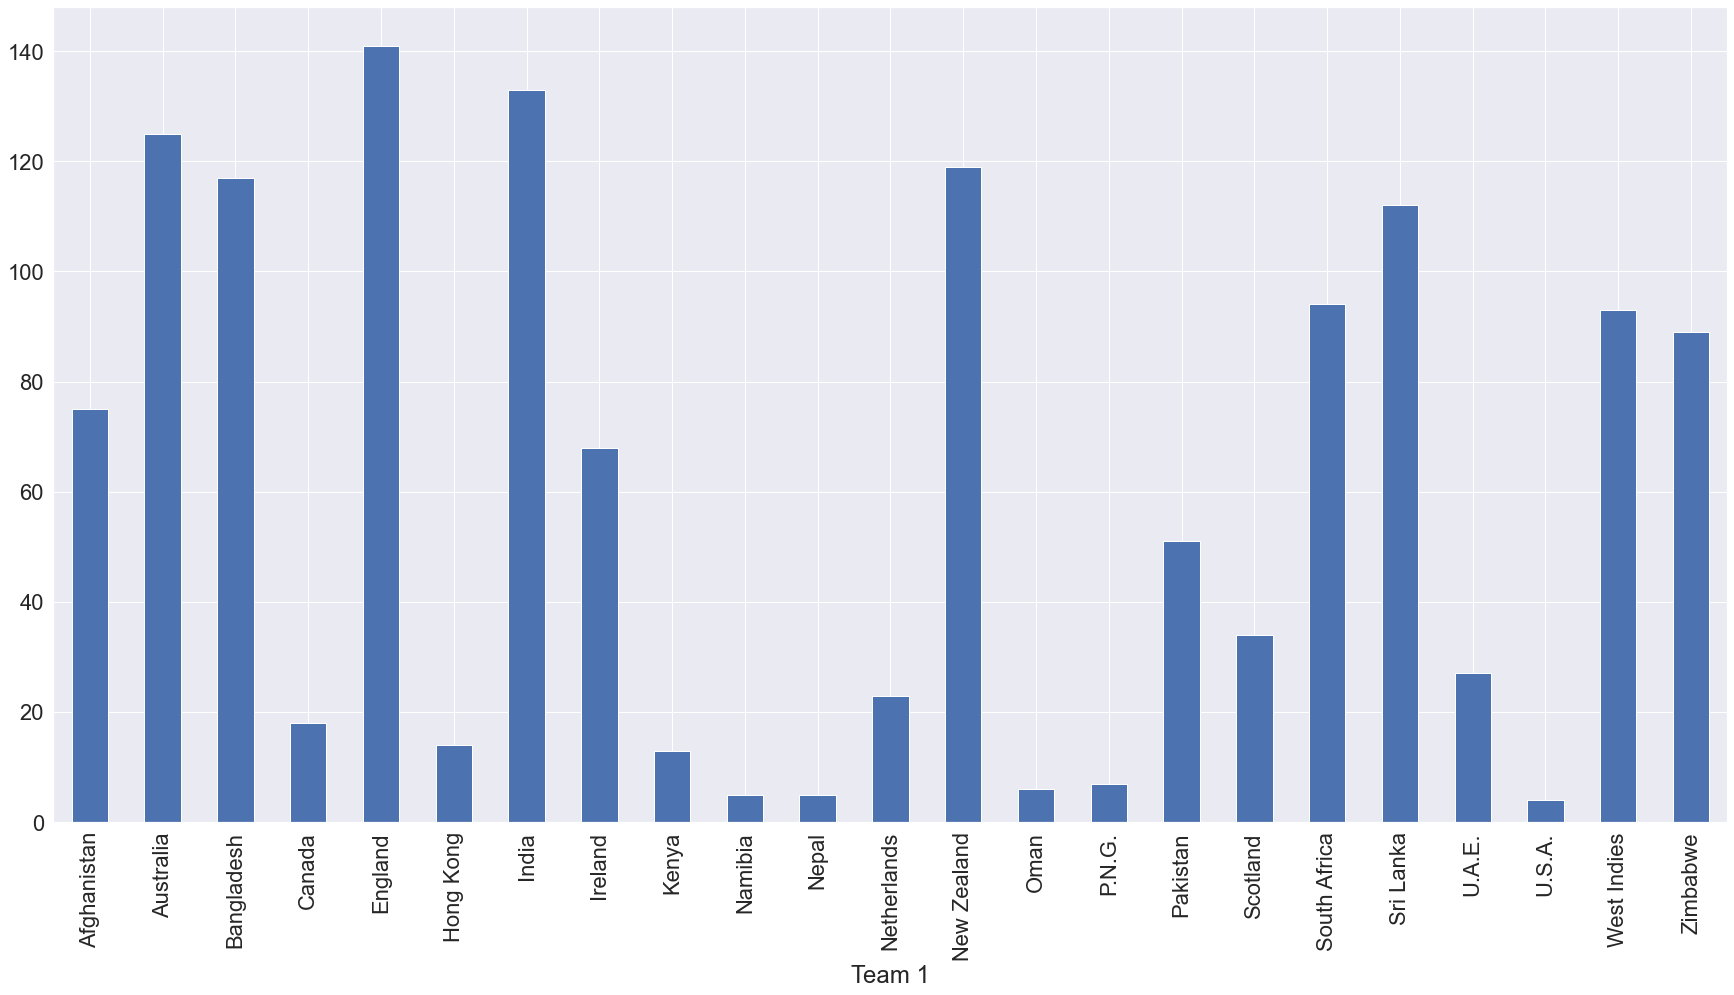

In [172]:
# group data by Team 1

ax=df.groupby('Team 1').size().plot(kind='bar')

plt.xticks(rotation=90)
plt.show()



From above graph:

There are more samples of  Australia, Bangladesh, England, India, New Zealand, West Indies, Zimbabwe as team1 as compared to other teams and
samples of Namibia, Oman, Nepal, P.N.G, U.S.A as team1 are very less

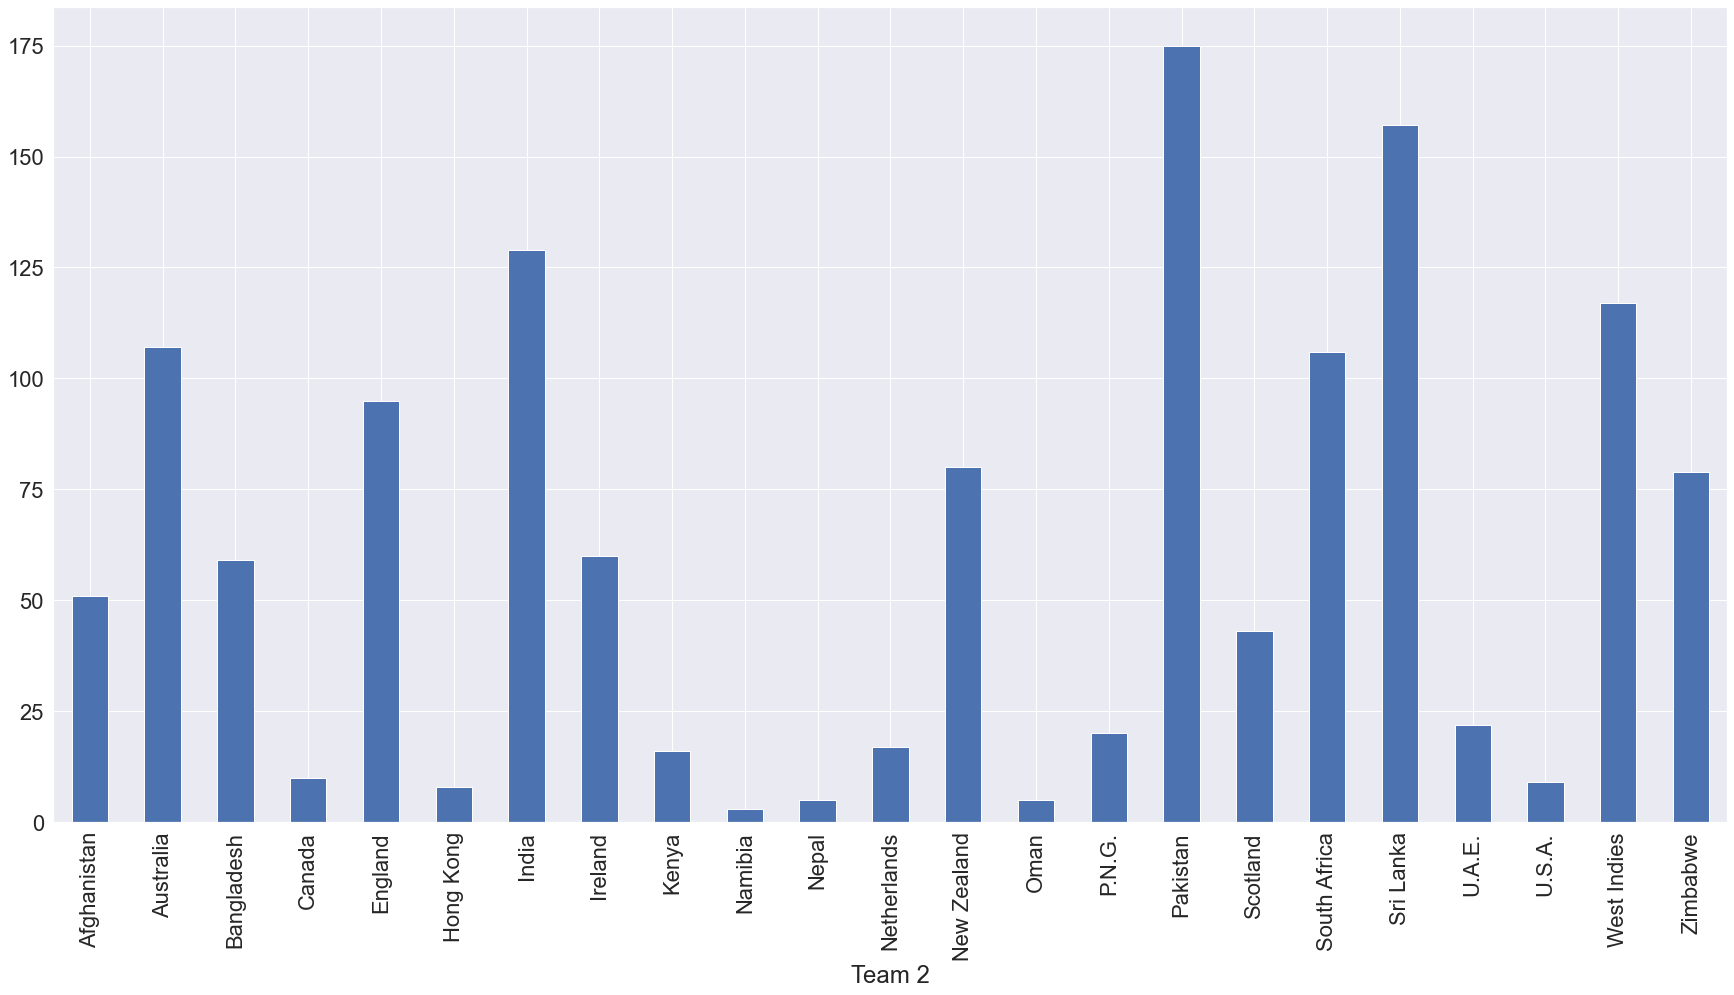

In [173]:
# group data by Team 2 
ax=df.groupby(['Team 2']).size()
ax.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

From the above graph:

There are more samples of Australia, England, India, Pakistan, West Indies, Sri Lanka, South Africa  as team2 compared to other teams and 
samples of  Namibia, Oman, Nepal, P.N.G, U.S.A, kenya, Hong Kong, Canada as team2 are very less

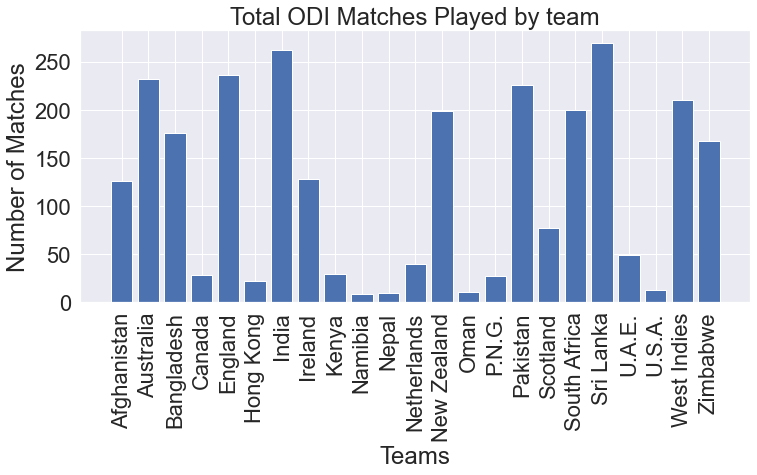

In [174]:
group1=df.groupby("Team 1").size().rename('Team 1')
group2=df.groupby("Team 2").size().rename('Team 2')
total_df=pd.concat([group1,group2],axis=1)
total_df["total"]=total_df["Team 1"]+total_df["Team 2"]
plt.figure(figsize=(12,5))
plt.bar(total_df.index,total_df["total"])
plt.ylabel("Number of Matches")
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.title("Total ODI Matches Played by team")
plt.show()

Sri Lanka and India have played the most number of ODI matches 

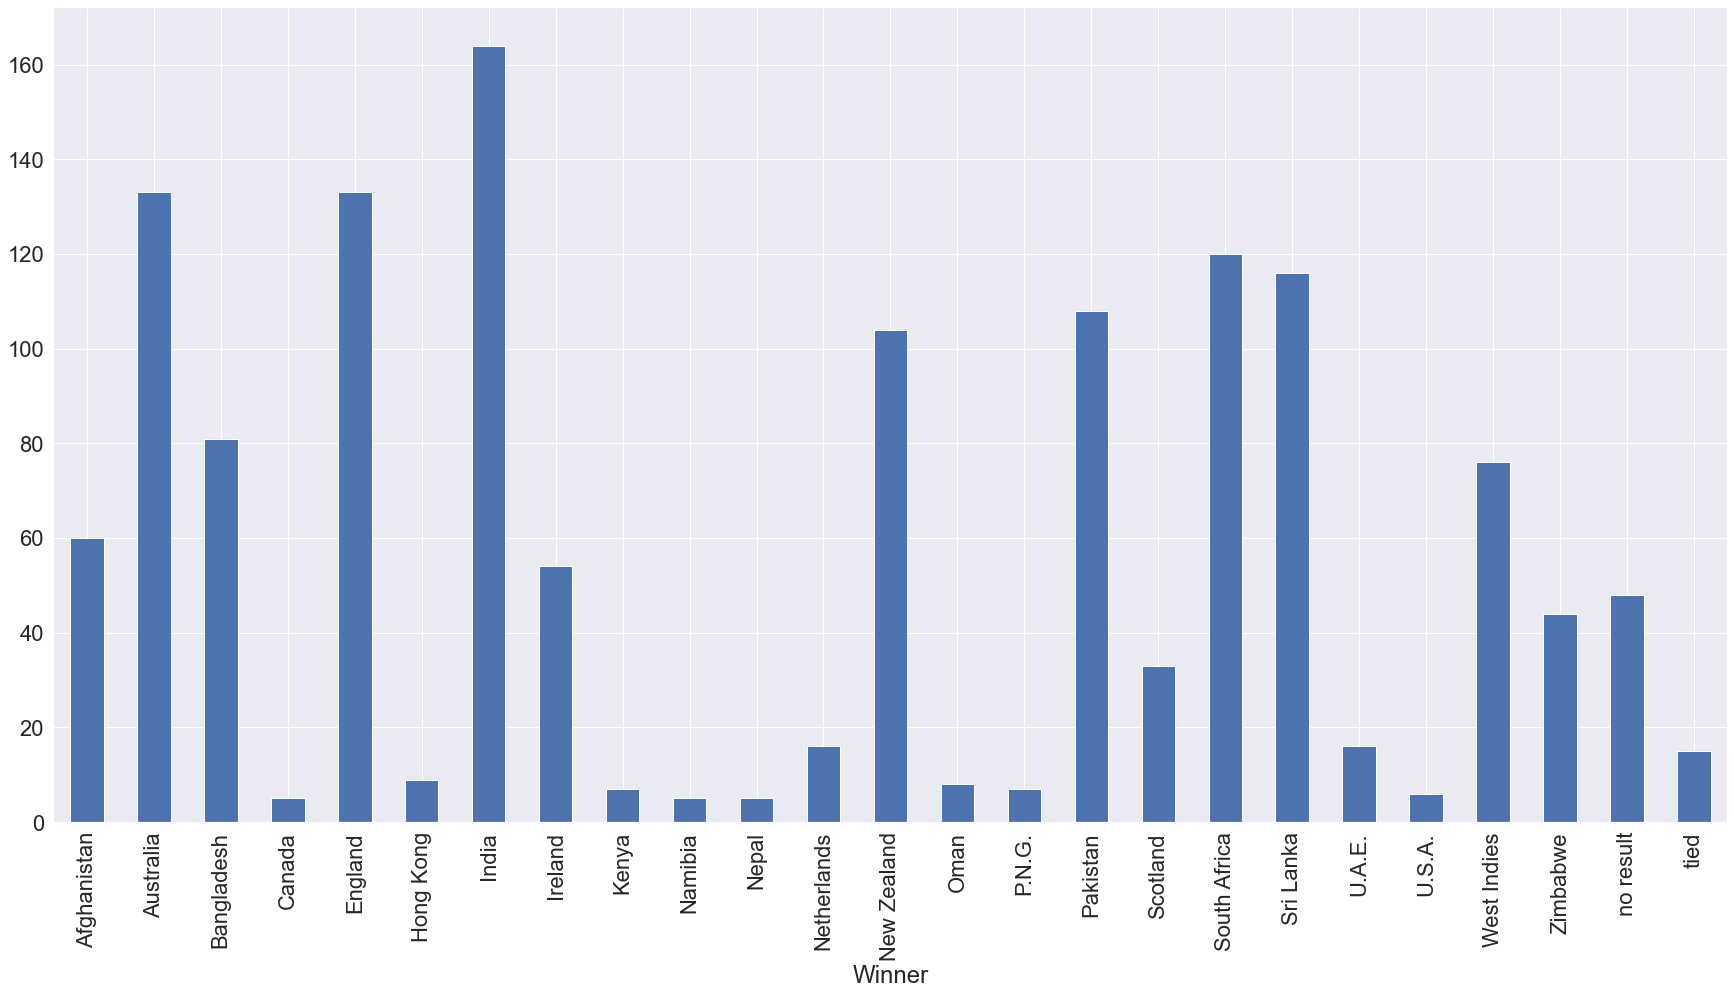

In [175]:
# group data by Winner 
ax=df.groupby(['Winner']).size()
ax.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

From above graph:
India has won the highest number of ODI matches,followed by Australia, England, South Africa and Sri Lanka. Canada, Kenya, USA, Nepal, Netherlands have won very few matches.
Also there are many matches with no result and few which were tied.

In [176]:
total_df['won']=df.groupby(['Winner']).size()[:-2]
total_df['ratio']=total_df['won']/total_df['total']
print(total_df.sort_values('ratio',ascending=False))

              Team 1  Team 2  total  won     ratio
Oman               6       5     11    8  0.727273
India            133     129    262  164  0.625954
Namibia            5       3      8    5  0.625000
South Africa      94     106    200  120  0.600000
Australia        125     107    232  133  0.573276
England          141      95    236  133  0.563559
New Zealand      119      80    199  104  0.522613
Nepal              5       5     10    5  0.500000
Pakistan          51     175    226  108  0.477876
Afghanistan       75      51    126   60  0.476190
U.S.A.             4       9     13    6  0.461538
Bangladesh       117      59    176   81  0.460227
Sri Lanka        112     157    269  116  0.431227
Scotland          34      43     77   33  0.428571
Ireland           68      60    128   54  0.421875
Hong Kong         14       8     22    9  0.409091
Netherlands       23      17     40   16  0.400000
West Indies       93     117    210   76  0.361905
U.A.E.            27      22   

Although our result says Oman and Namibia have won most of the matches thay have played, we can neglect them as they have played very little matches. India has the highest won/played ratio followed by South Africa, Australia, England and New Zealand.

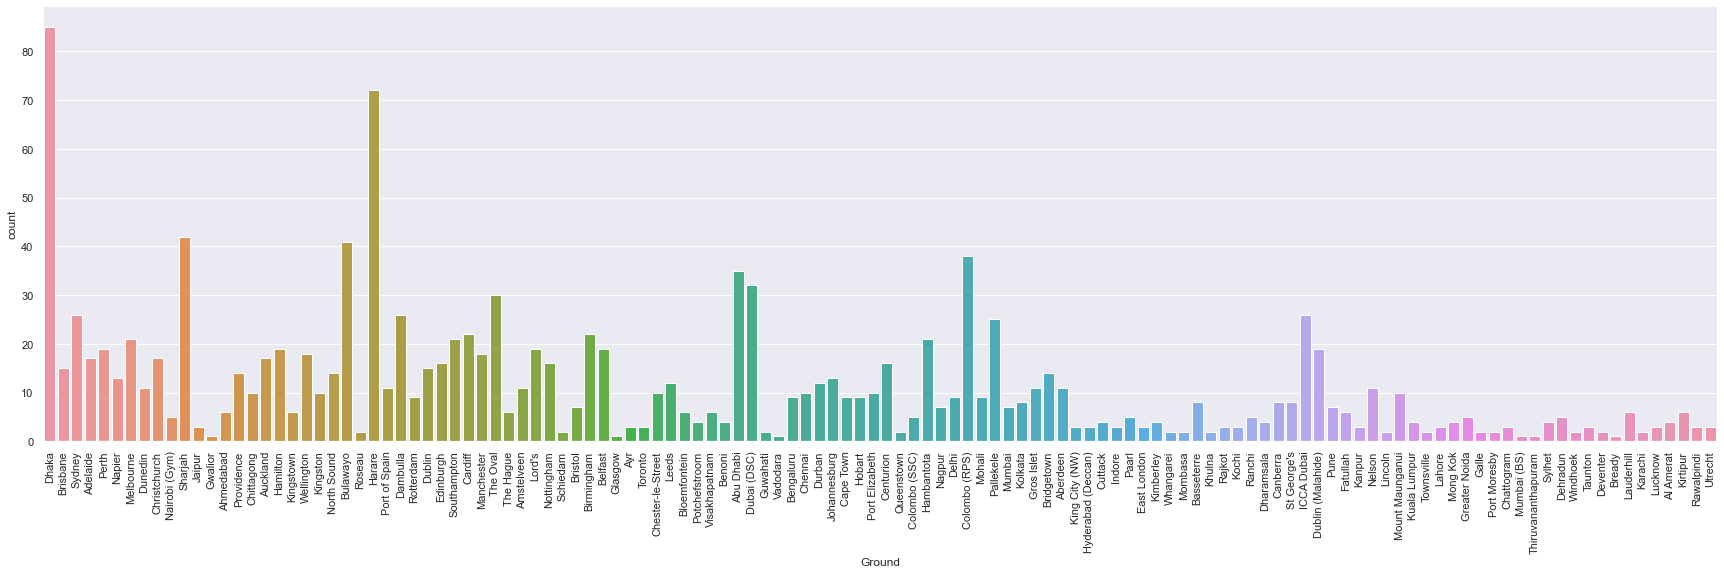

In [177]:
# group data by Ground and plot count plot
sns.set(rc = {'figure.figsize':(30,8)})
ax = sns.countplot(x ='Ground',data = df)
ticks=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Many matches were conducted in Dhaka, Harare, Abu dhabi, Bulawayo, Colombo (RPS) and Sharjah

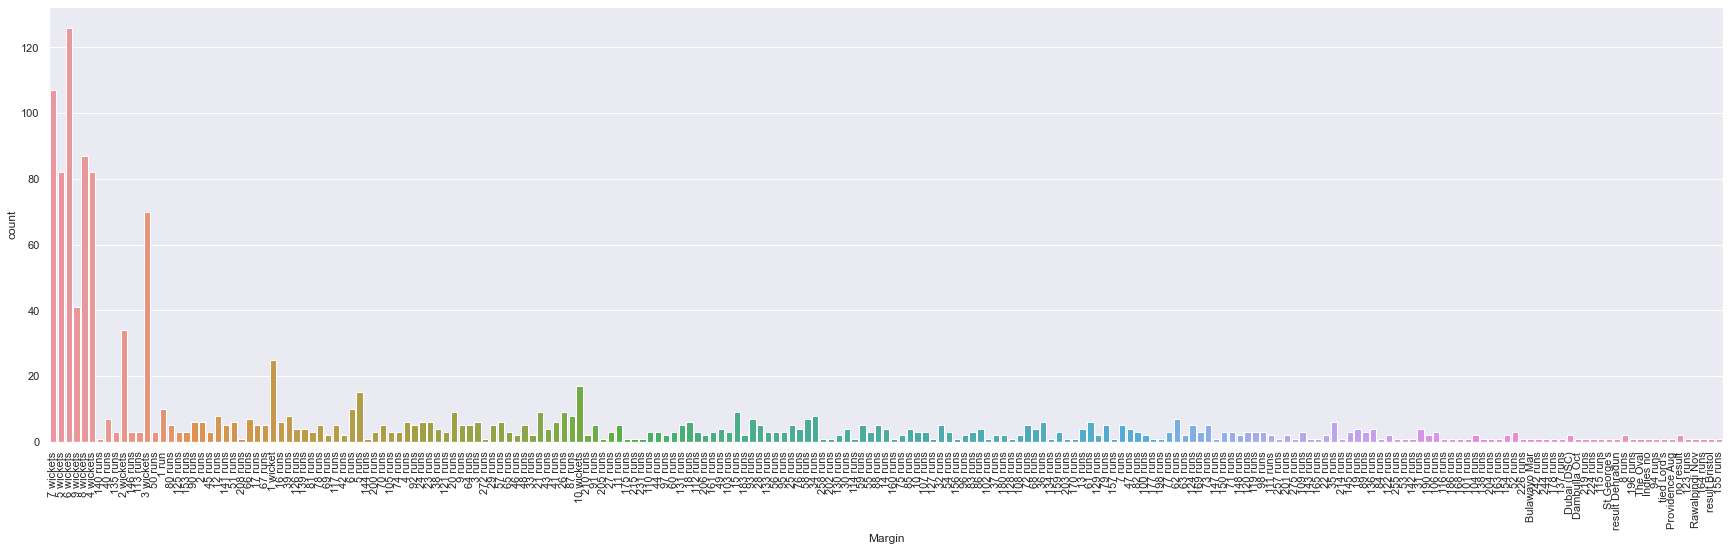

In [24]:
# group data by Margin and plot count plot
sns.set(rc = {'figure.figsize':(30,8)})
ax = sns.countplot(x ='Margin',data = df)
ticks=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

The margin for few matches are very high then other matches, we need to sclae these numbers.

# Swarmplot
A swarm plot is a type of scatter plot that is used for representing categorical values. It is very similar to the strip plot, but it avoids the overlapping of points

C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.7

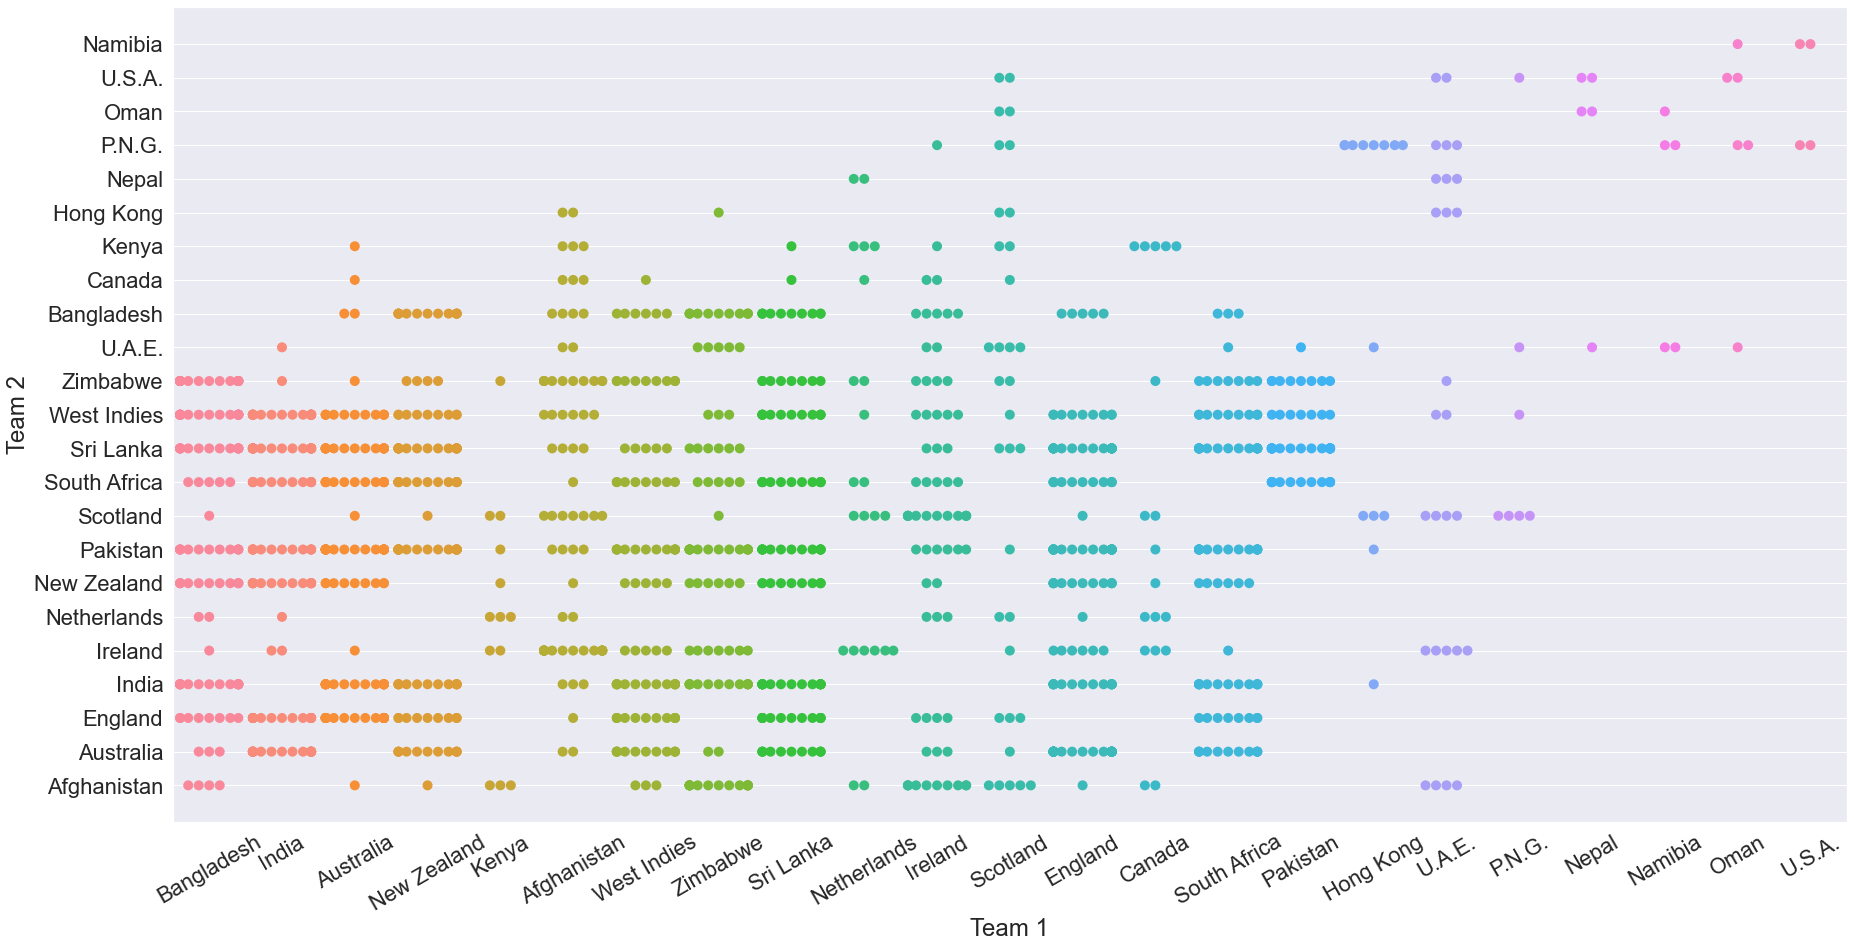

In [25]:
# swarm plot between Team 1 and Team 2 columns 
sns.set(rc = {'figure.figsize':(30,15)},font_scale=2)
g=sns.swarmplot(x="Team 1", y="Team 2", data=df,s=10)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=30)


Almost all team 1 had matches with almost all team 2
but there are few teams which have played only with certain teams

C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.0

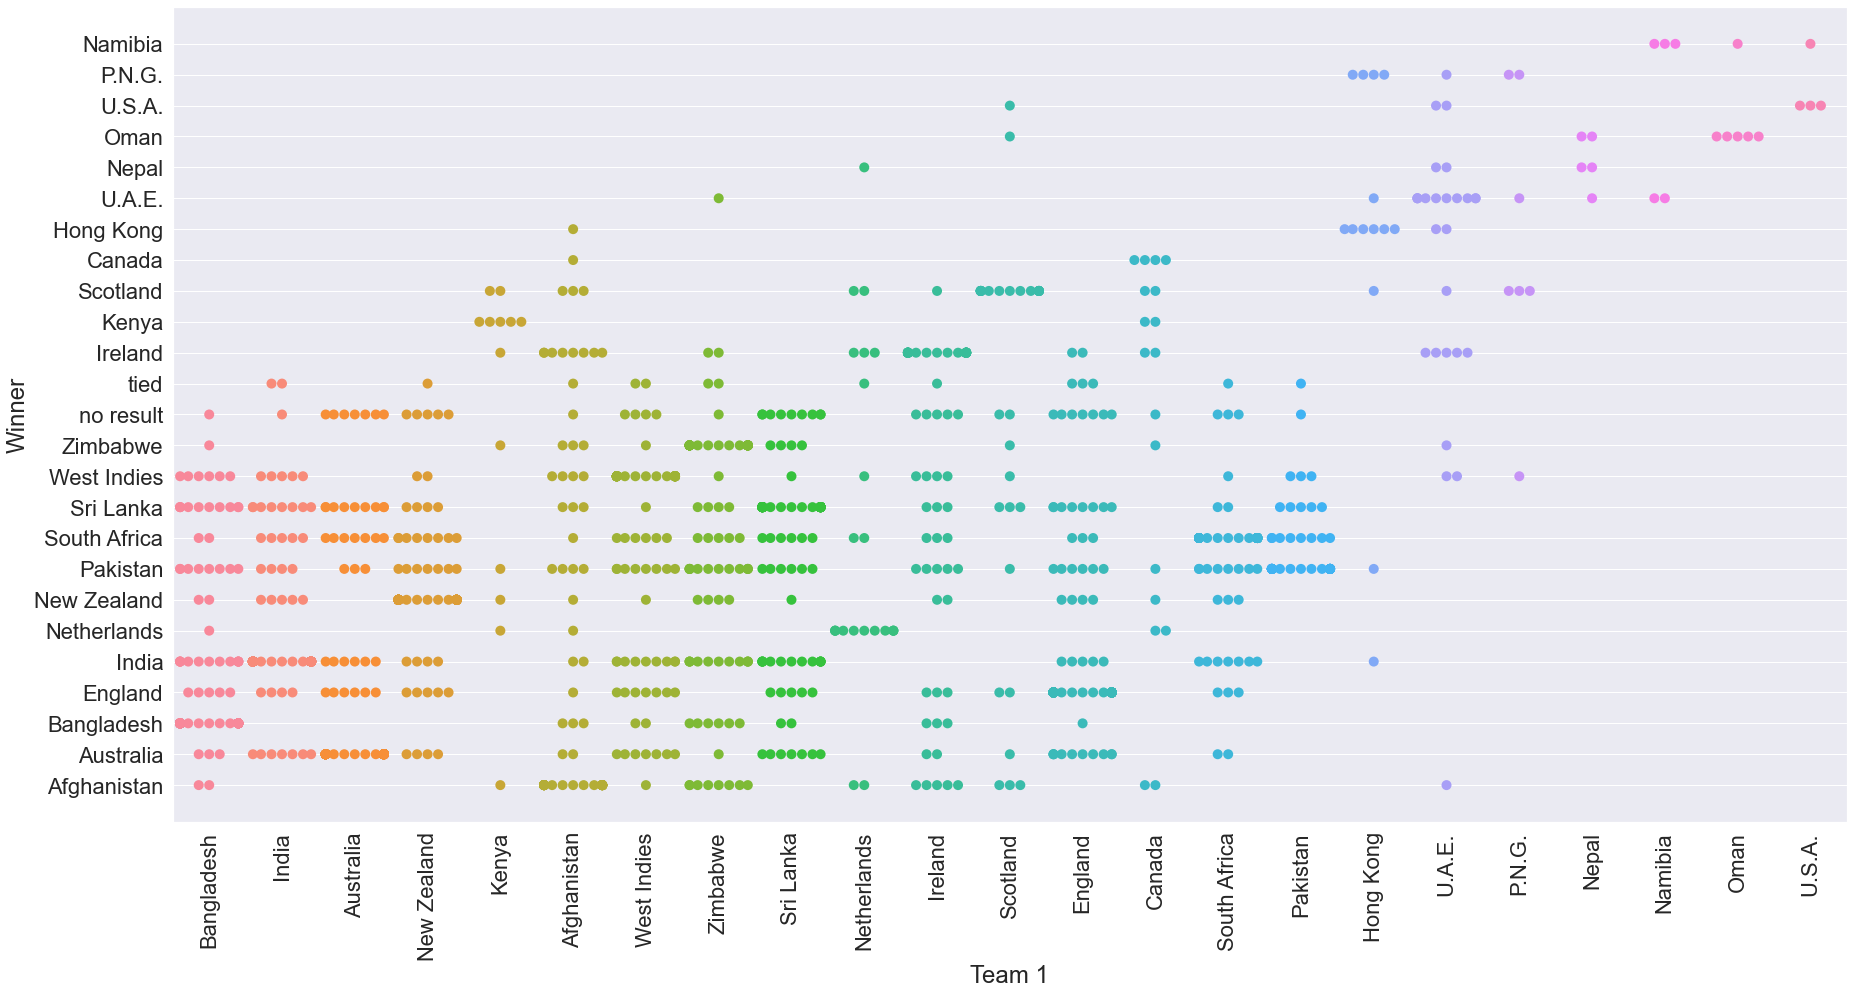

In [26]:
# swarm plot between Team 1 and Winner column 
sns.set(rc = {'figure.figsize':(30,15)},font_scale=2)
g=sns.swarmplot(x="Team 1", y="Winner", data=df,s=10)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=90)

Some teams have won more frequently than others

C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.1

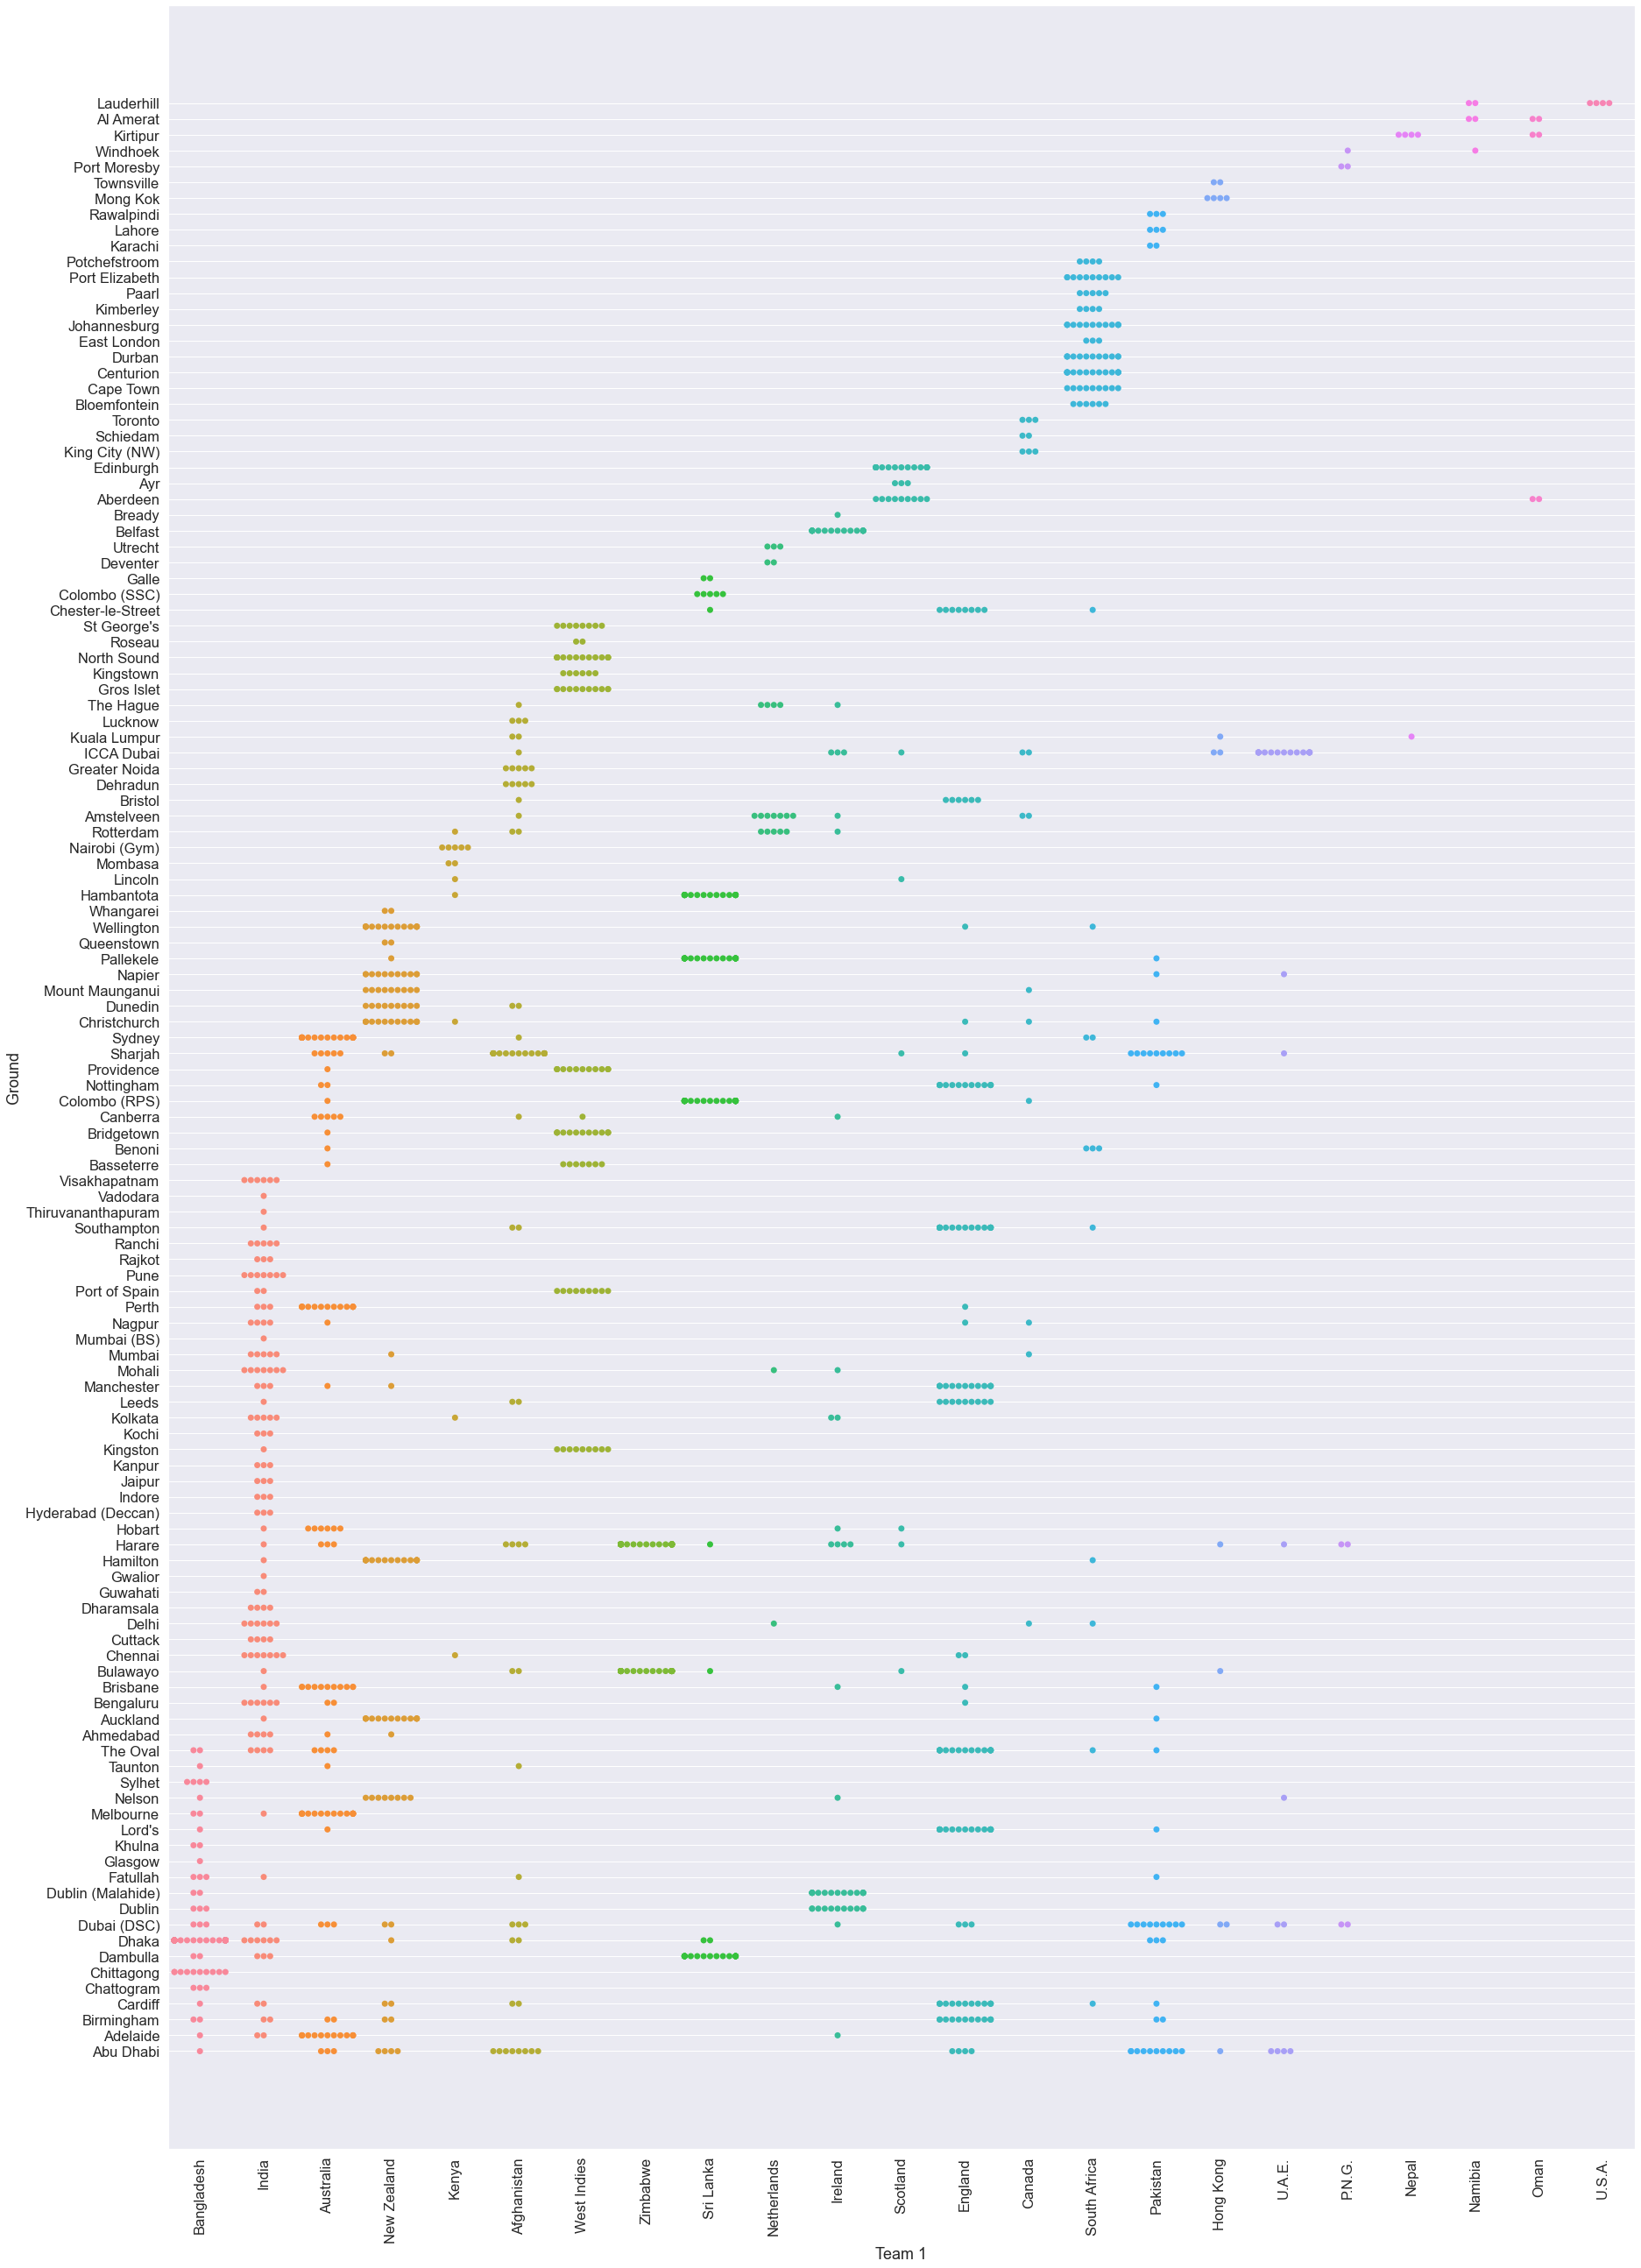

In [27]:
# swarm plot between Team 1 and Ground columns
sns.set(rc = {'figure.figsize':(30,45)},font_scale=1.5)
g=sns.swarmplot(x="Team 1", y="Ground", data=df,s=7)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=90)

Some teams play at a certain ground repeatedly, especially in home grounds ( eg Bengaluru,Chennai,Mohali,Pune for India and Adelaide,Melbourne,Brisbane,Perth and Sydney for Australia)

C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.8

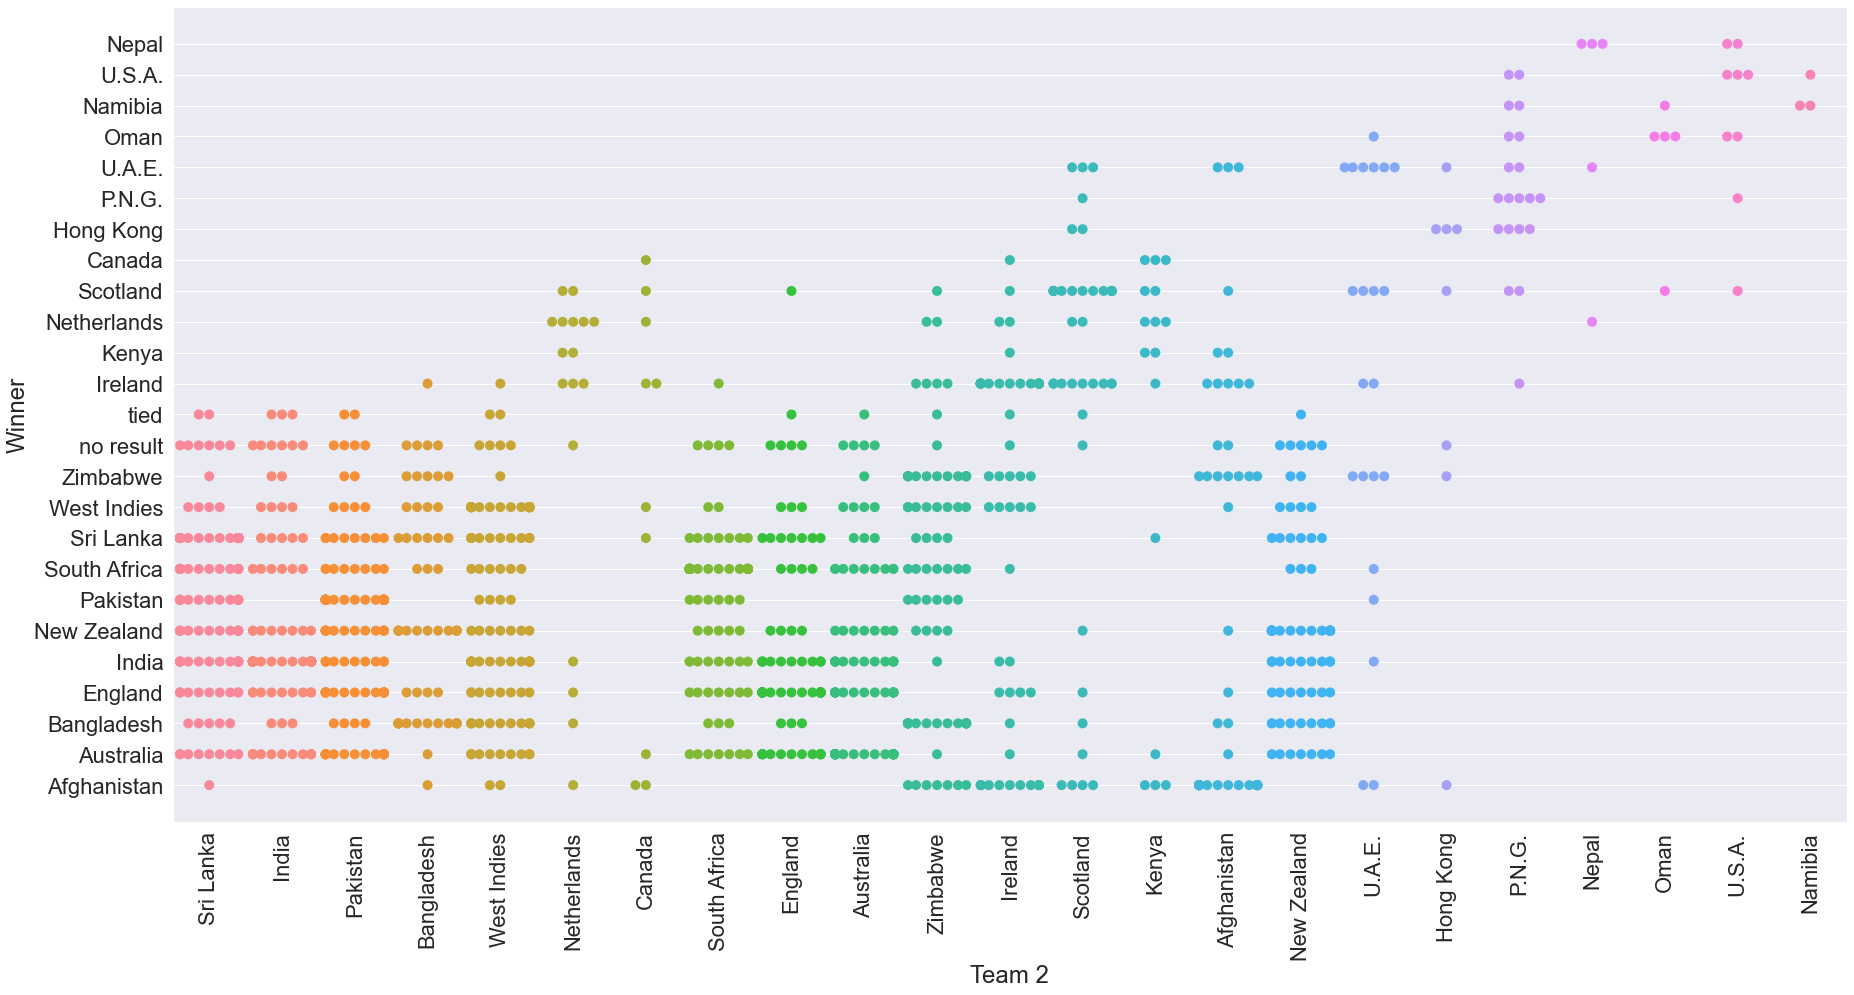

In [28]:
#swarm plot between team 2 and winner
sns.set(rc = {'figure.figsize':(30,15)},font_scale=2)
g=sns.swarmplot(x="Team 2", y="Winner", data=df,s=10)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=90)

C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.8% of

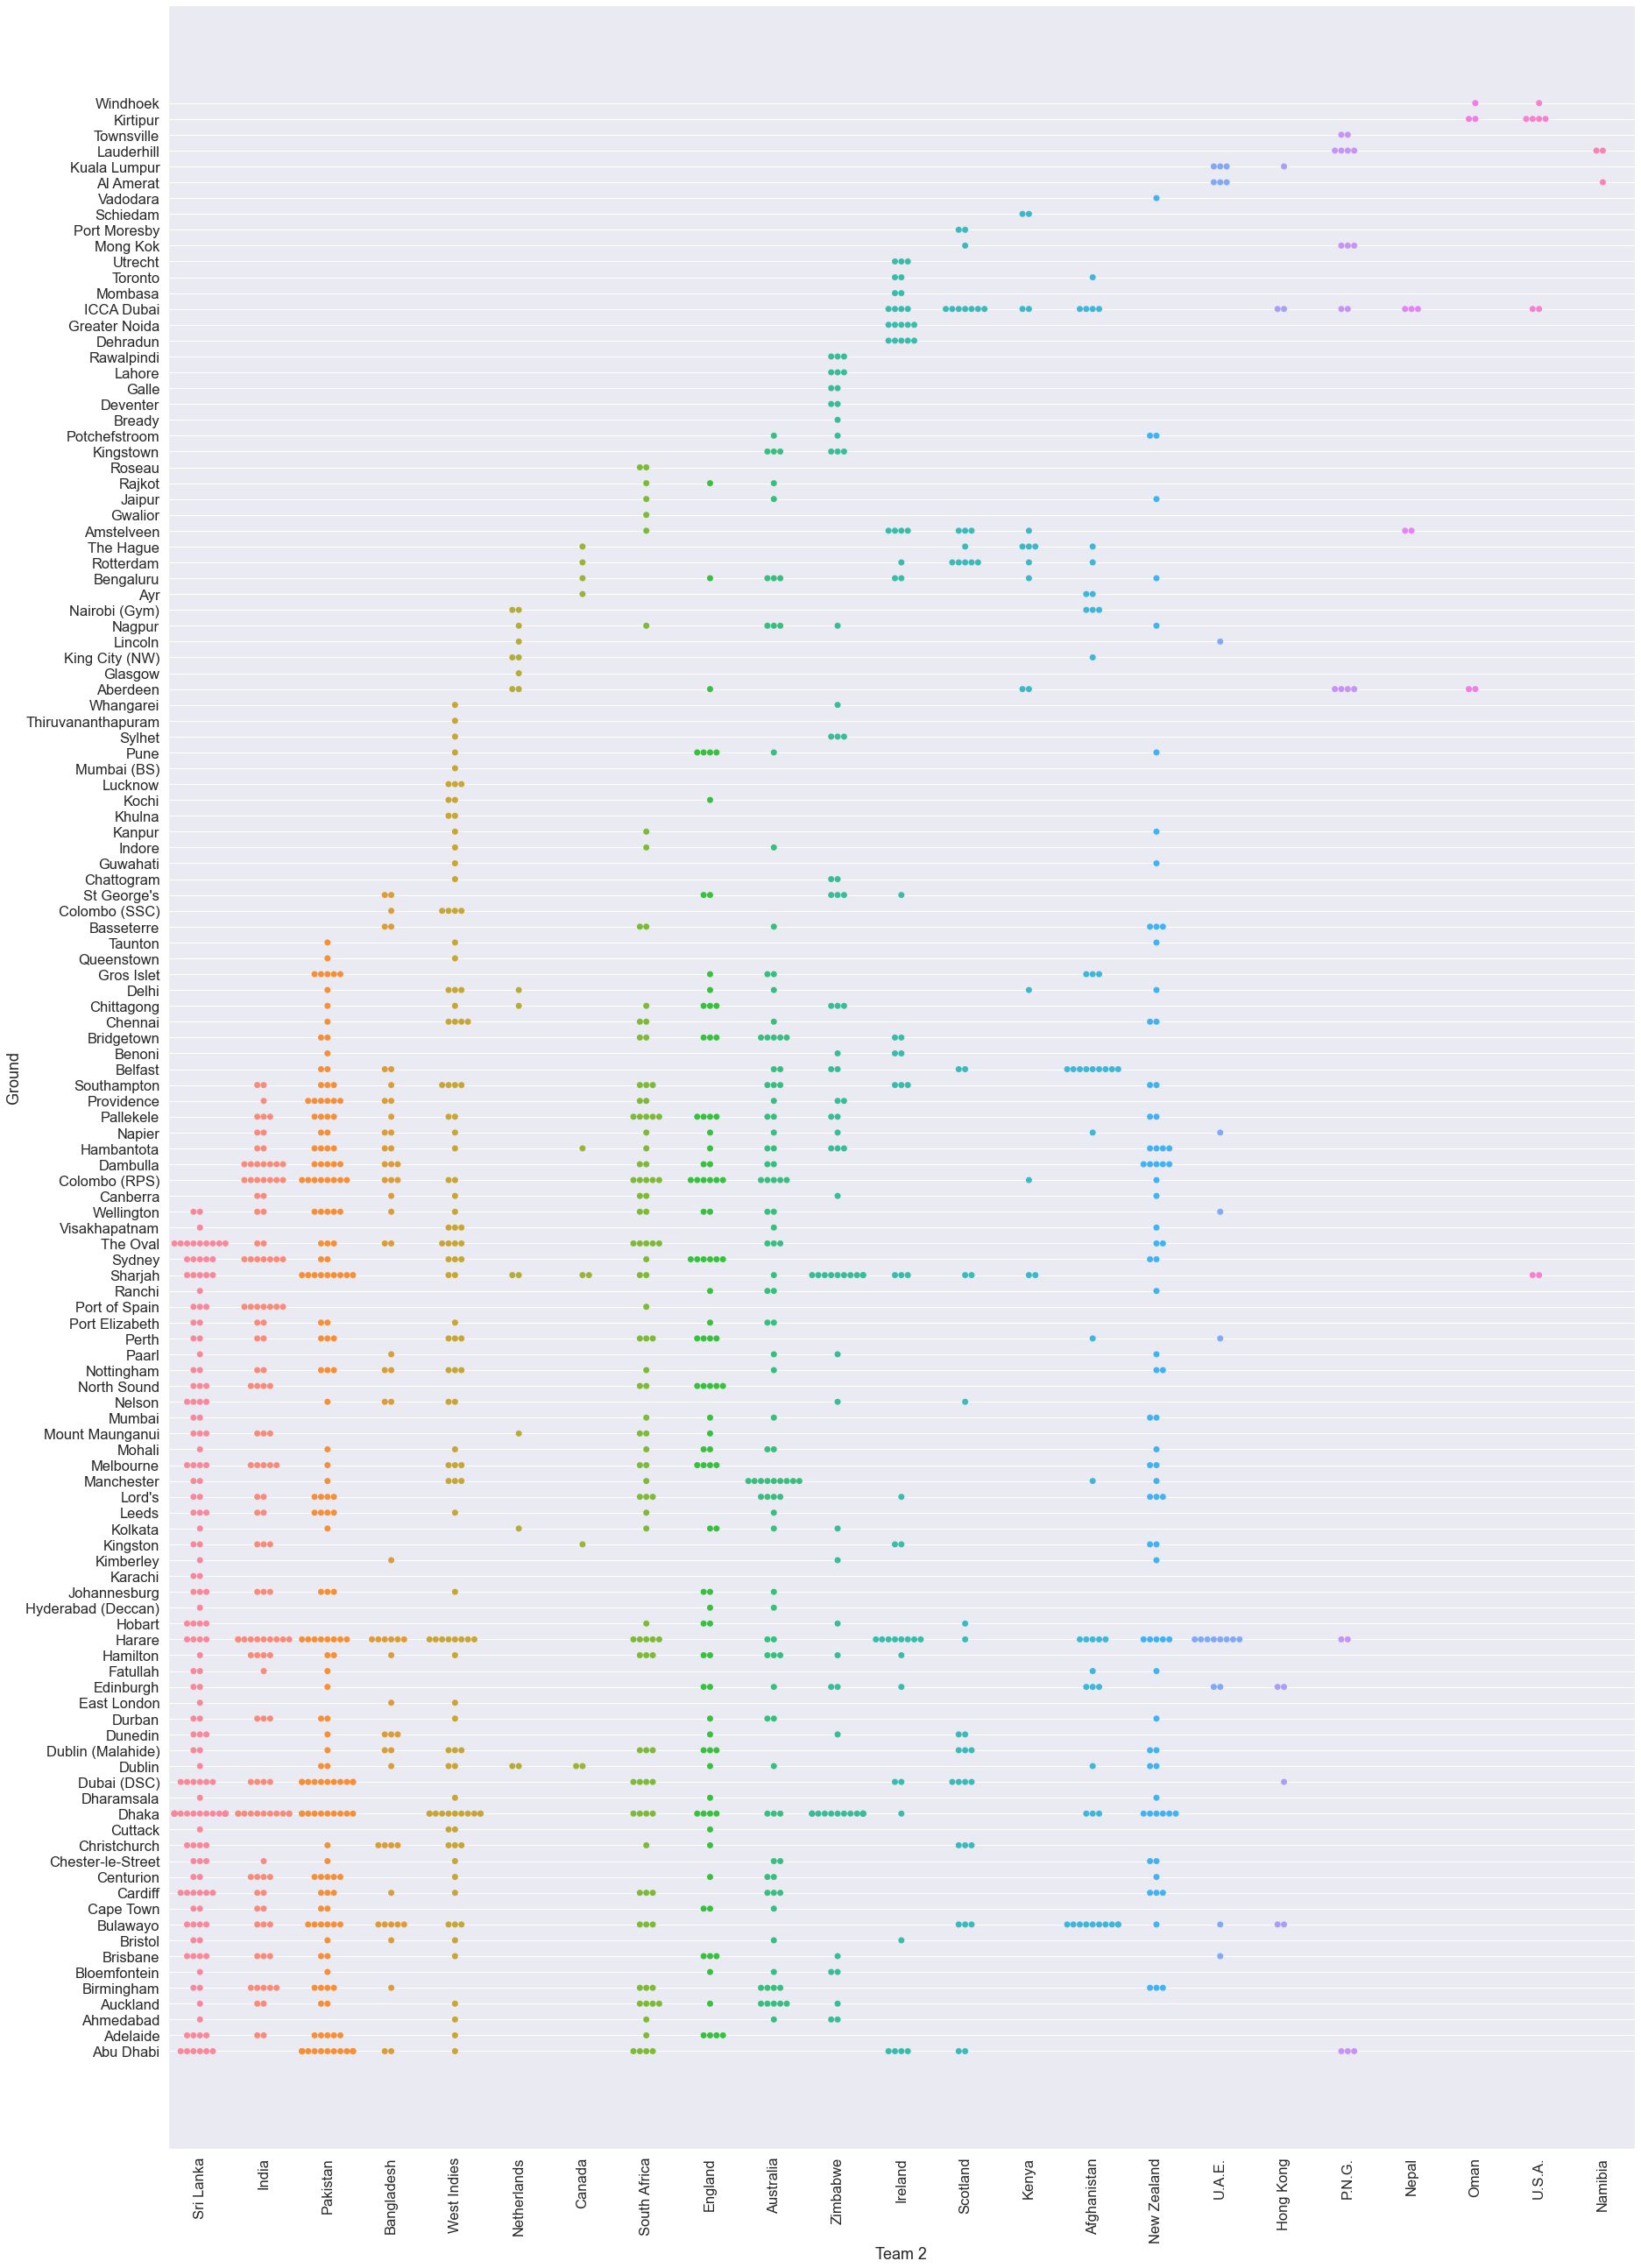

In [29]:
# swarm plot between Team 2 and Ground columns 
sns.set(rc = {'figure.figsize':(30,45)},font_scale=1.5)
g=sns.swarmplot(x="Team 2", y="Ground", data=df,s=7)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=90)

C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sneha K K\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.9

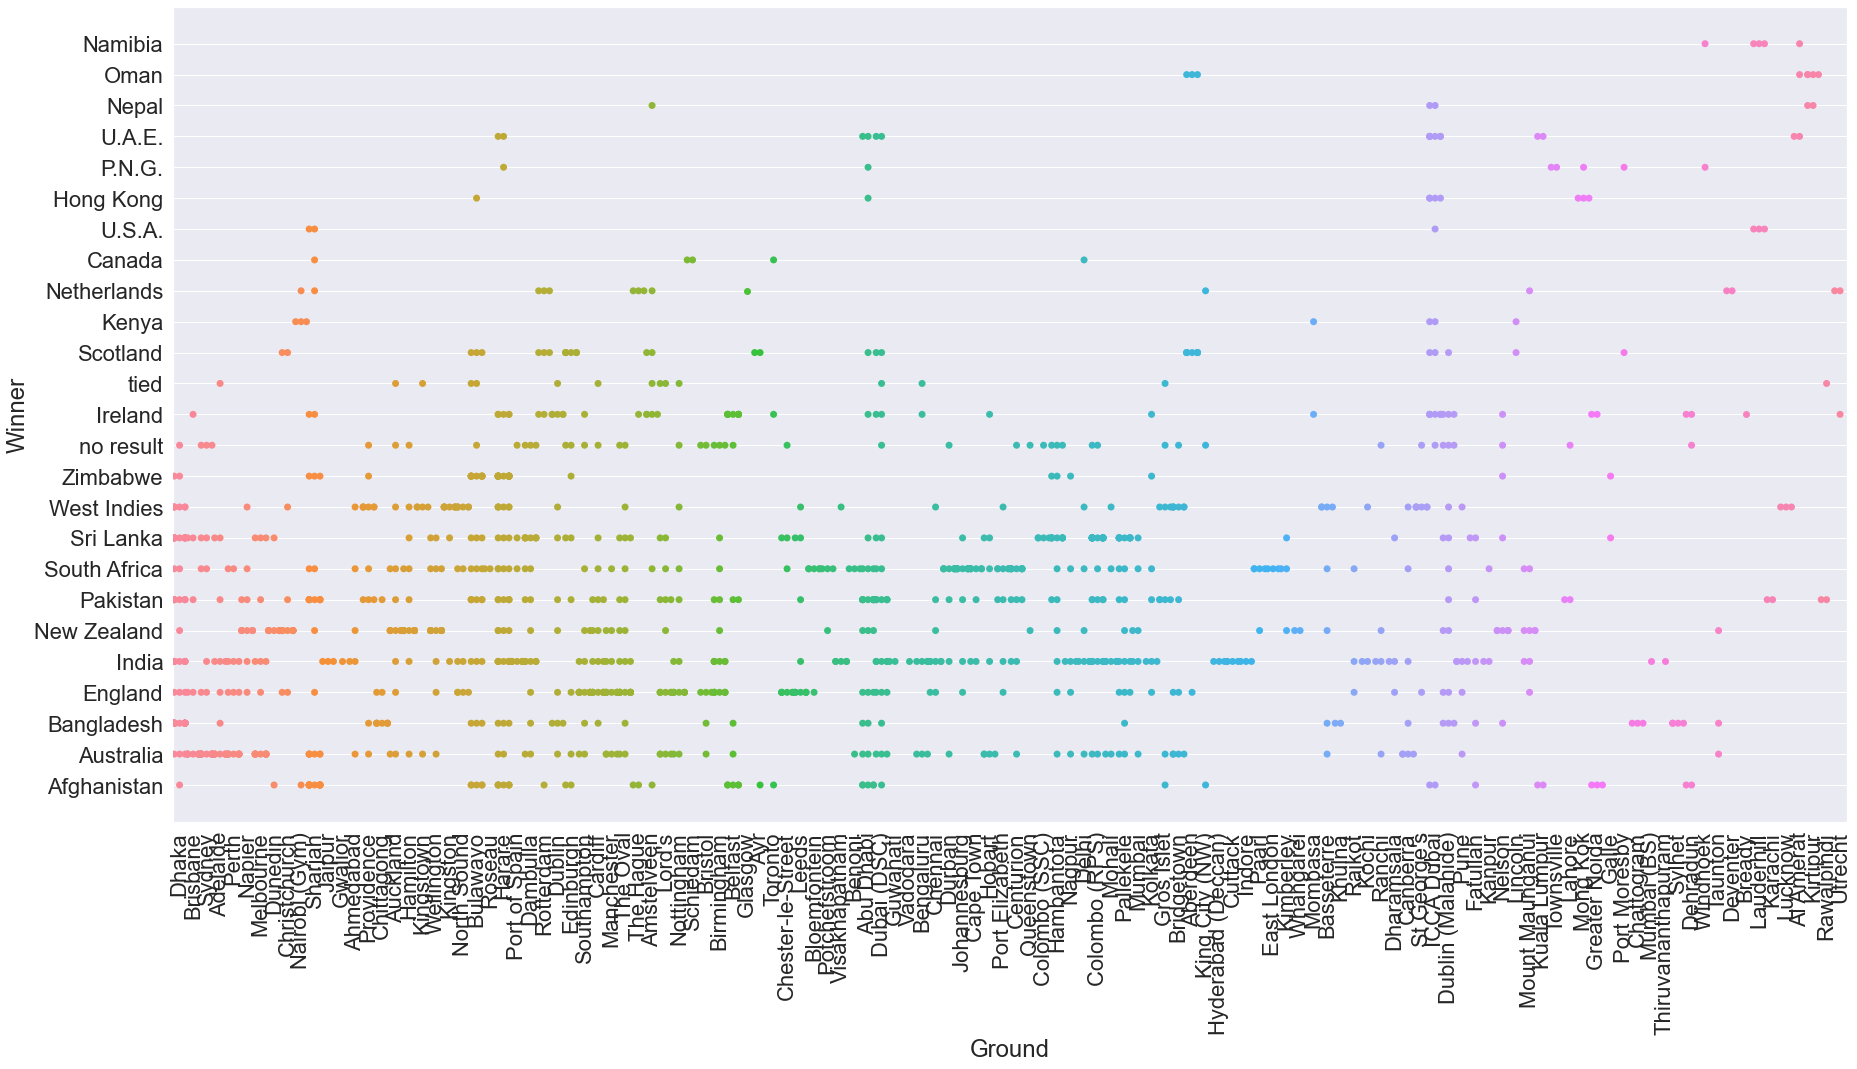

In [52]:
#swarm plot between Winner and Ground column 
sns.set(rc = {'figure.figsize':(30,15)},font_scale=2)
g=sns.swarmplot(x="Ground", y="Winner", data=df,s=7)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=90)

Before we start interpreting the result notice that a lot of points could not be placed in the plot and hence our interpretations will be misleading. This is a serious limitation of swarm plot and is fixed by strip plot

# Strip plot
A strip plot is a graphical data anlysis technique for summarizing a univariate data set.The strip plot is an alternative to a histogram or a density plot.

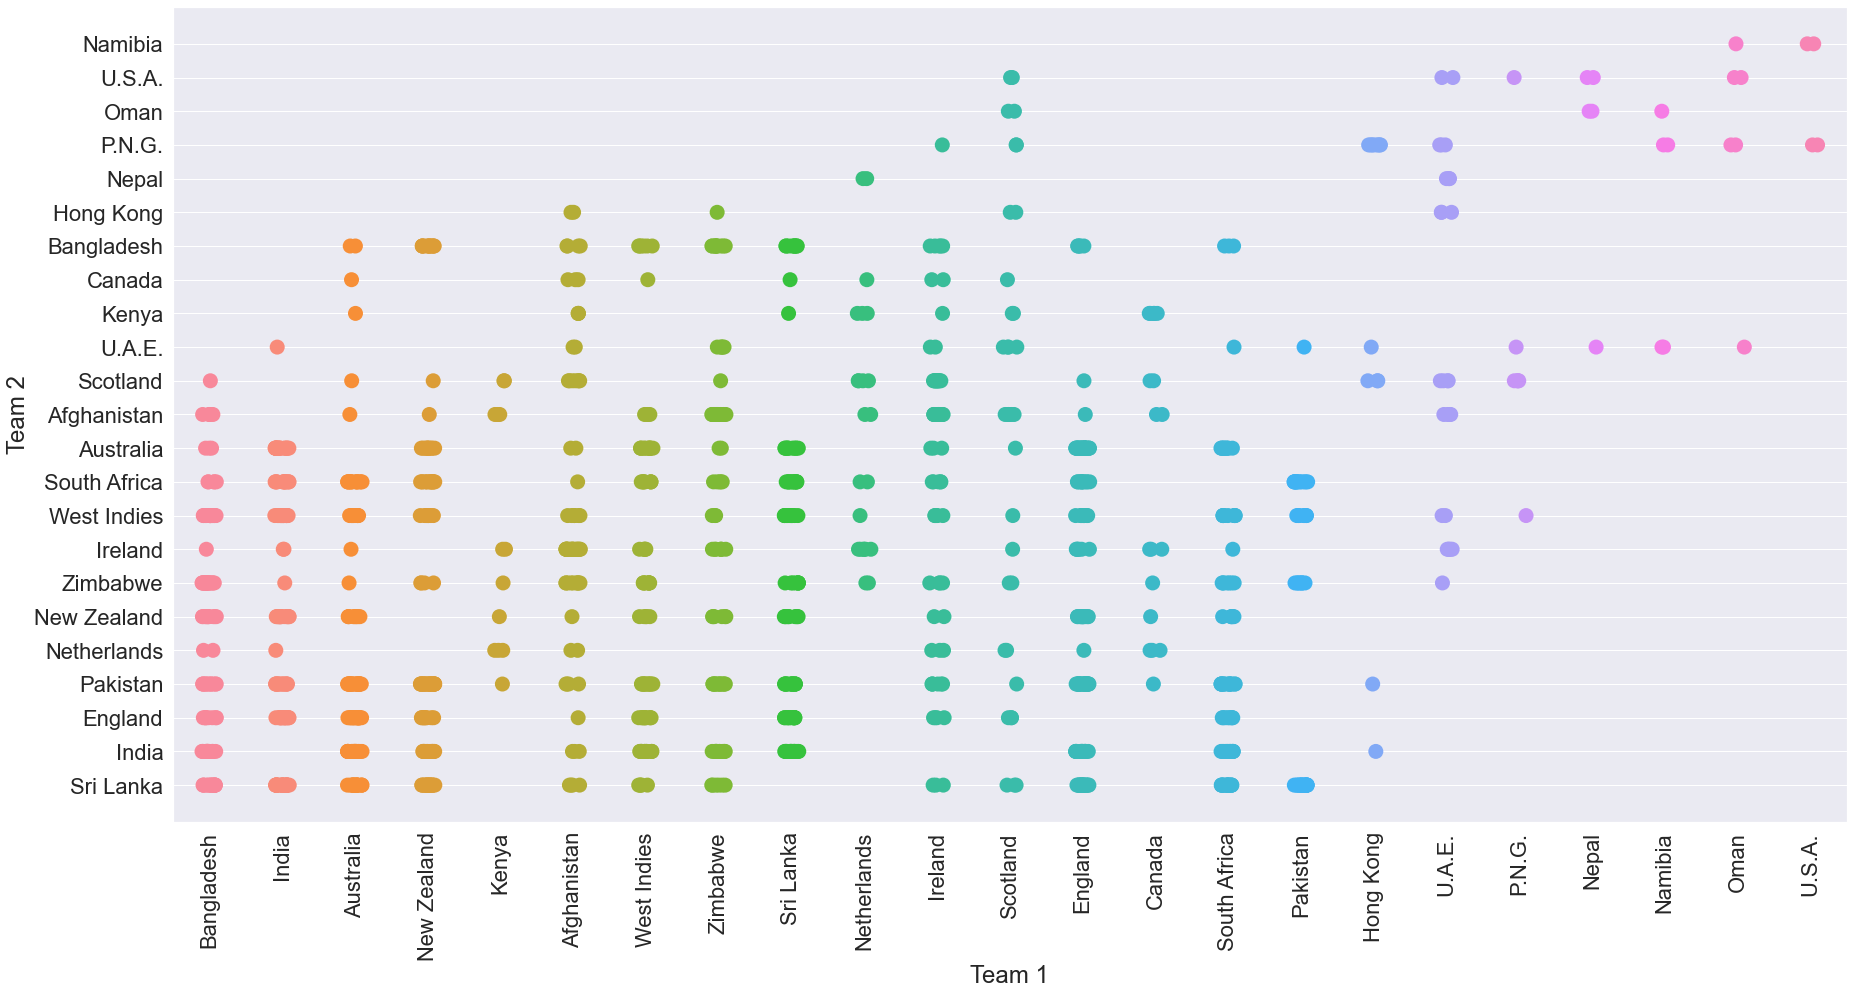

In [31]:
# strip plot between Team 1 and Team 2 column
sns.set(rc = {'figure.figsize':(30,15)},font_scale=2)
g=sns.stripplot(x="Team 1", y="Team 2", data=df,s=15)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=90)

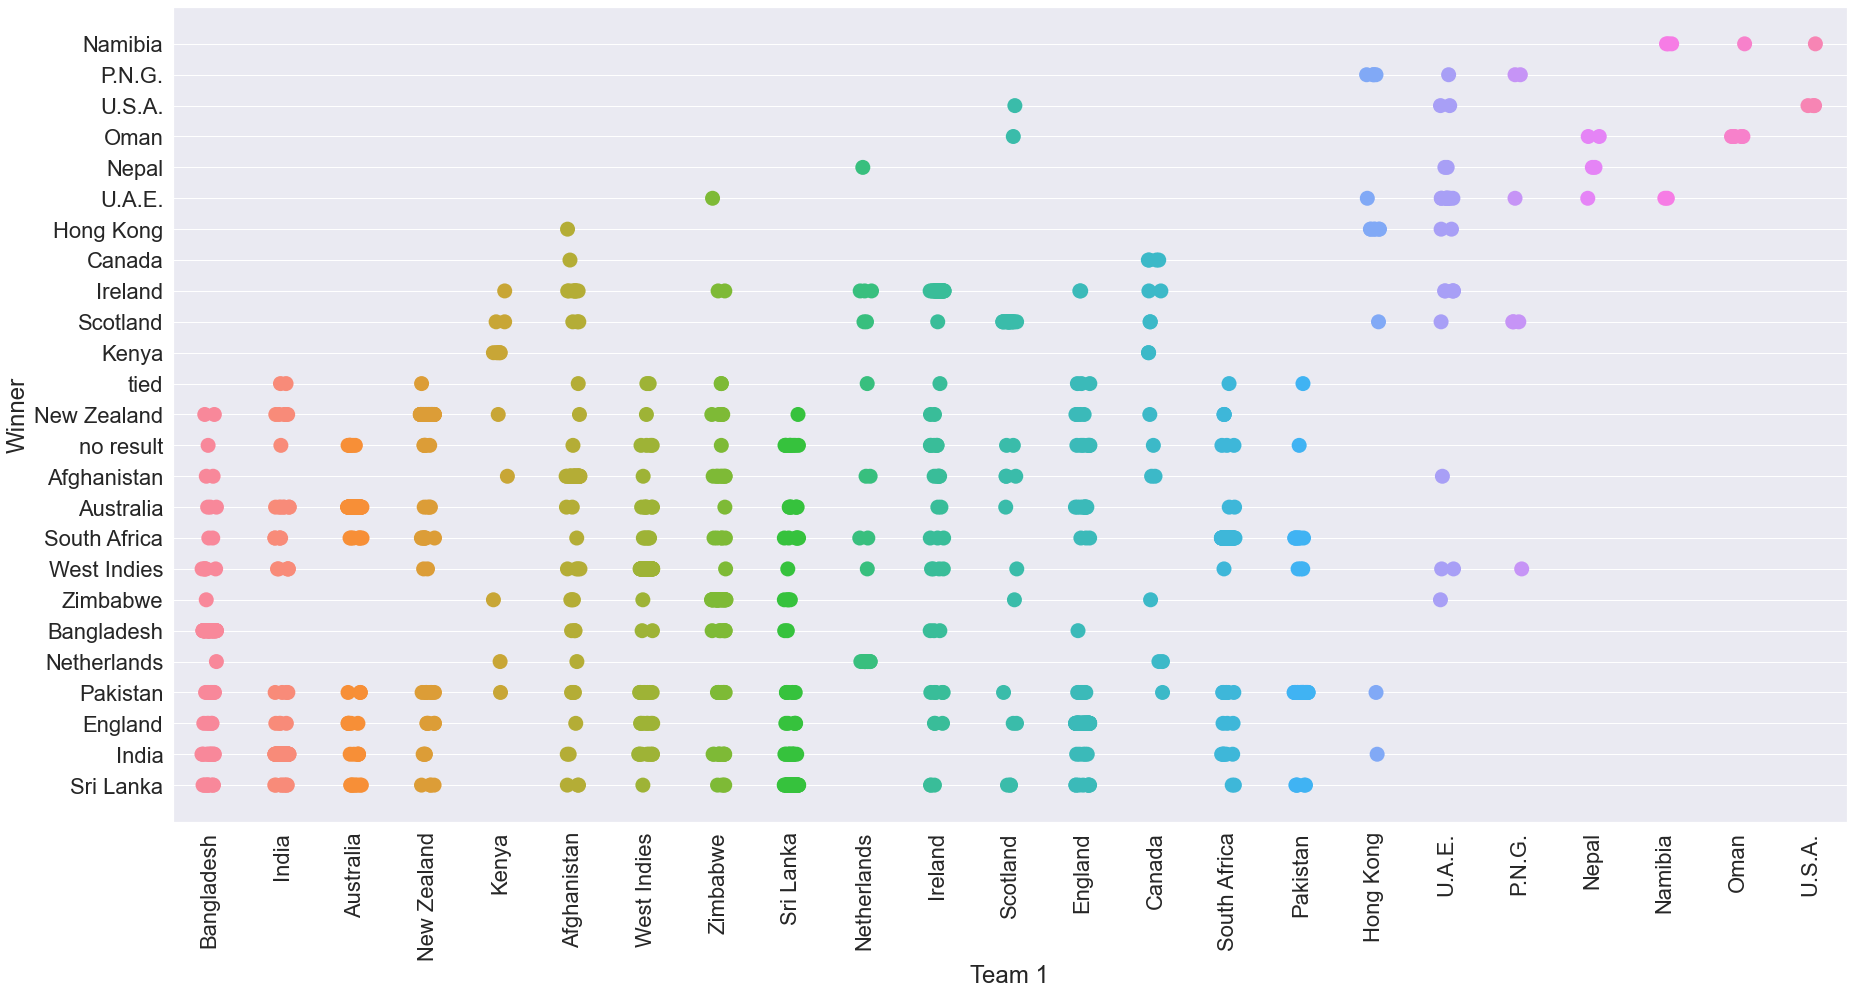

In [32]:
# strip plot between Team 1 and Winner column
sns.set(rc = {'figure.figsize':(30,15)},font_scale=2)
g=sns.stripplot(x="Team 1", y="Winner", data=df,s=15)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=90)

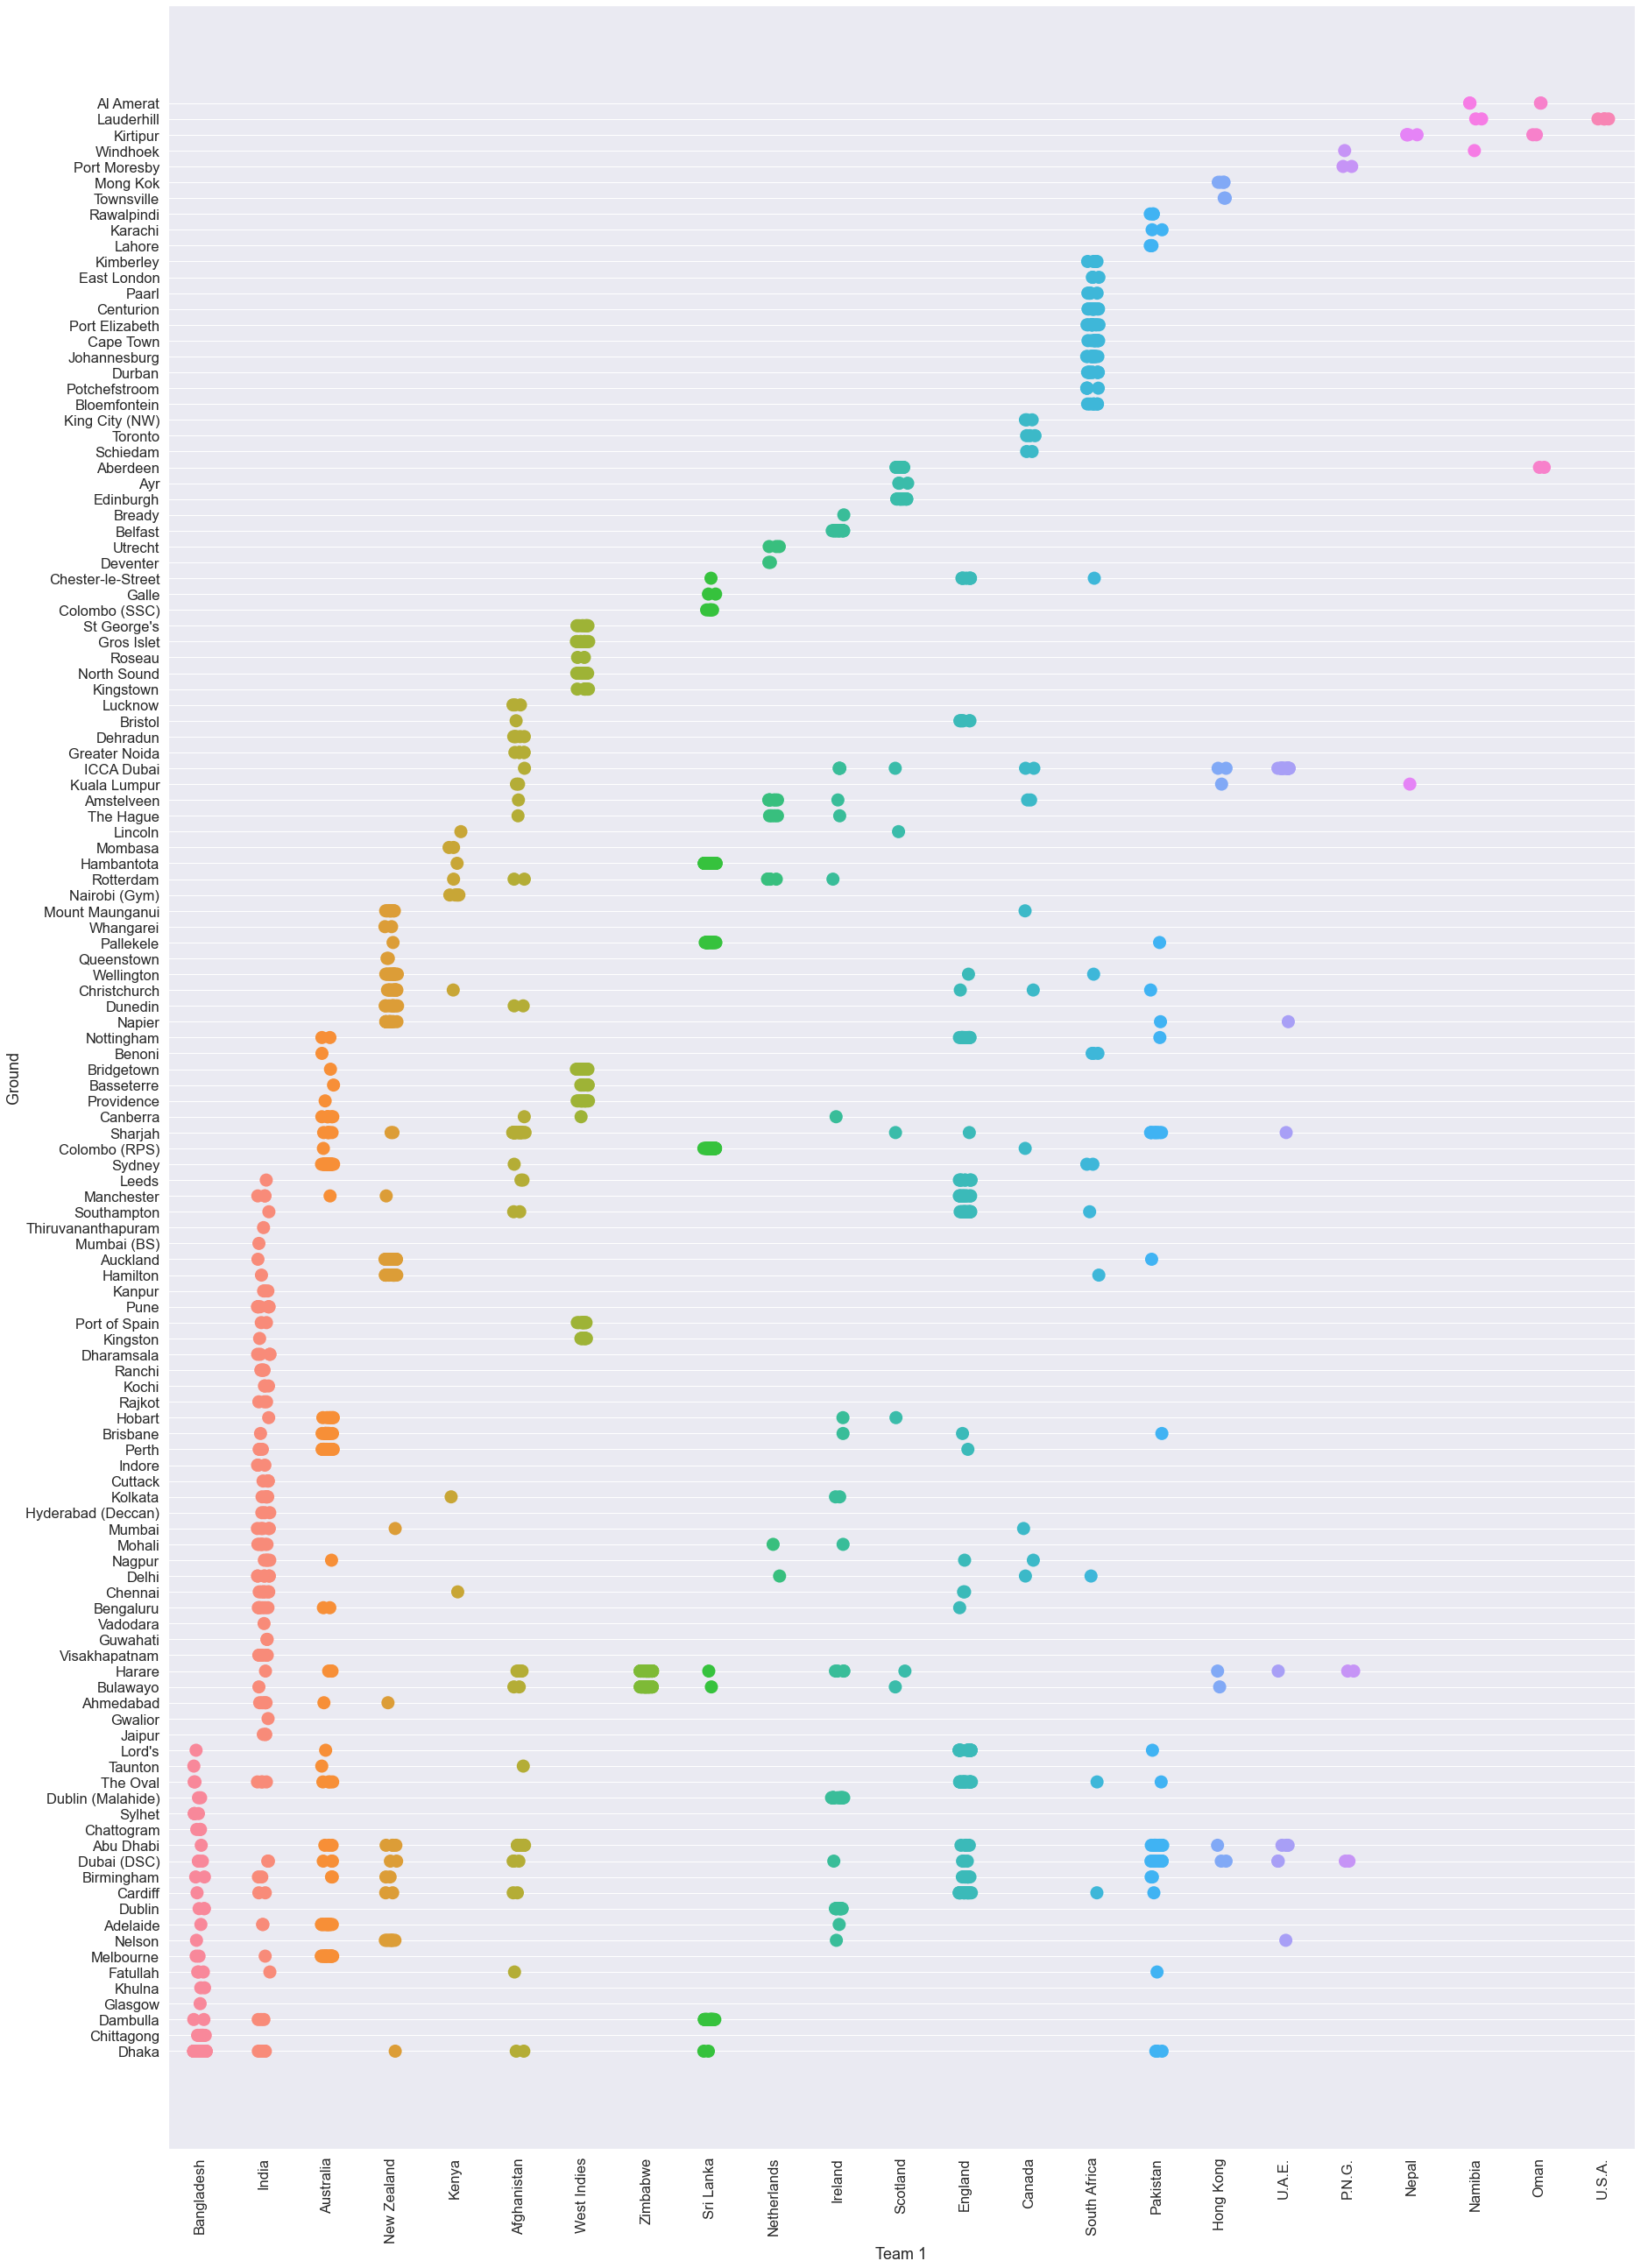

In [33]:
# strip plot between Team 1 and Ground column
sns.set(rc = {'figure.figsize':(30,45)},font_scale=1.5)
g=sns.stripplot(x="Team 1", y="Ground", data=df,s=15)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=90)

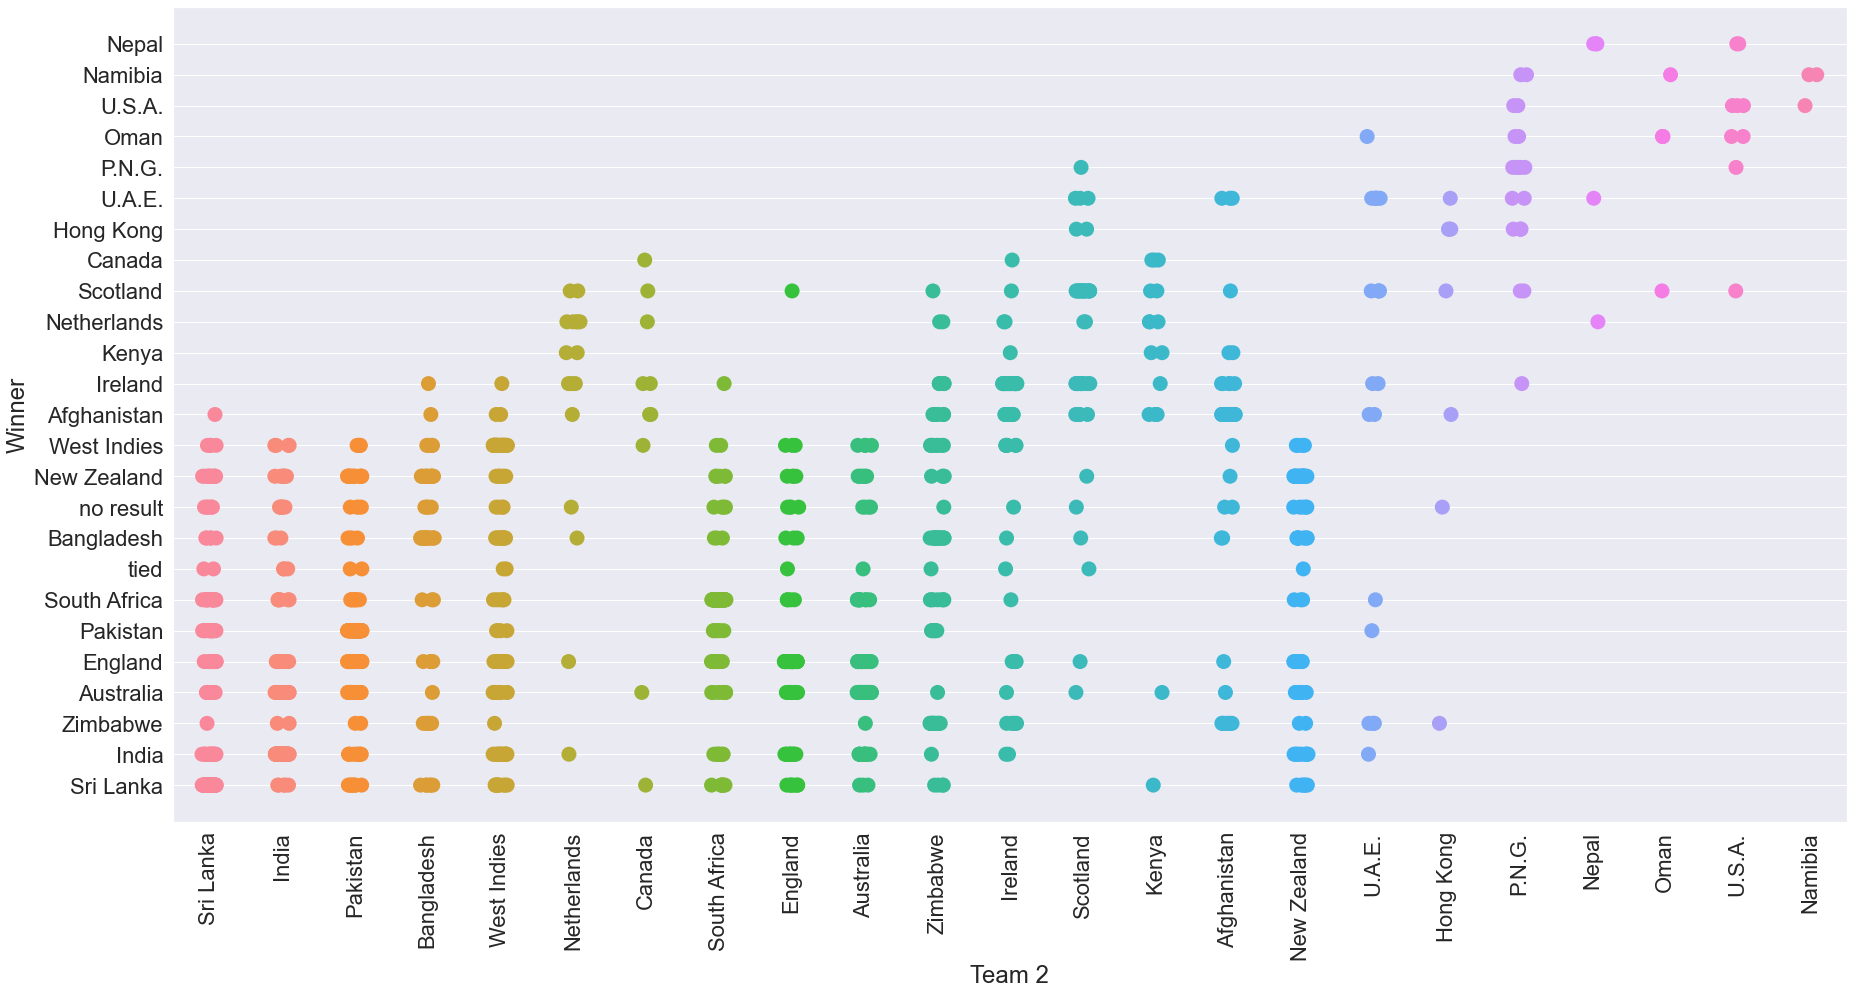

In [34]:
# strip plot between Team 2 and Winner column
sns.set(rc = {'figure.figsize':(30,15)},font_scale=2)
g=sns.stripplot(x="Team 2", y="Winner", data=df,s=15)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=90)

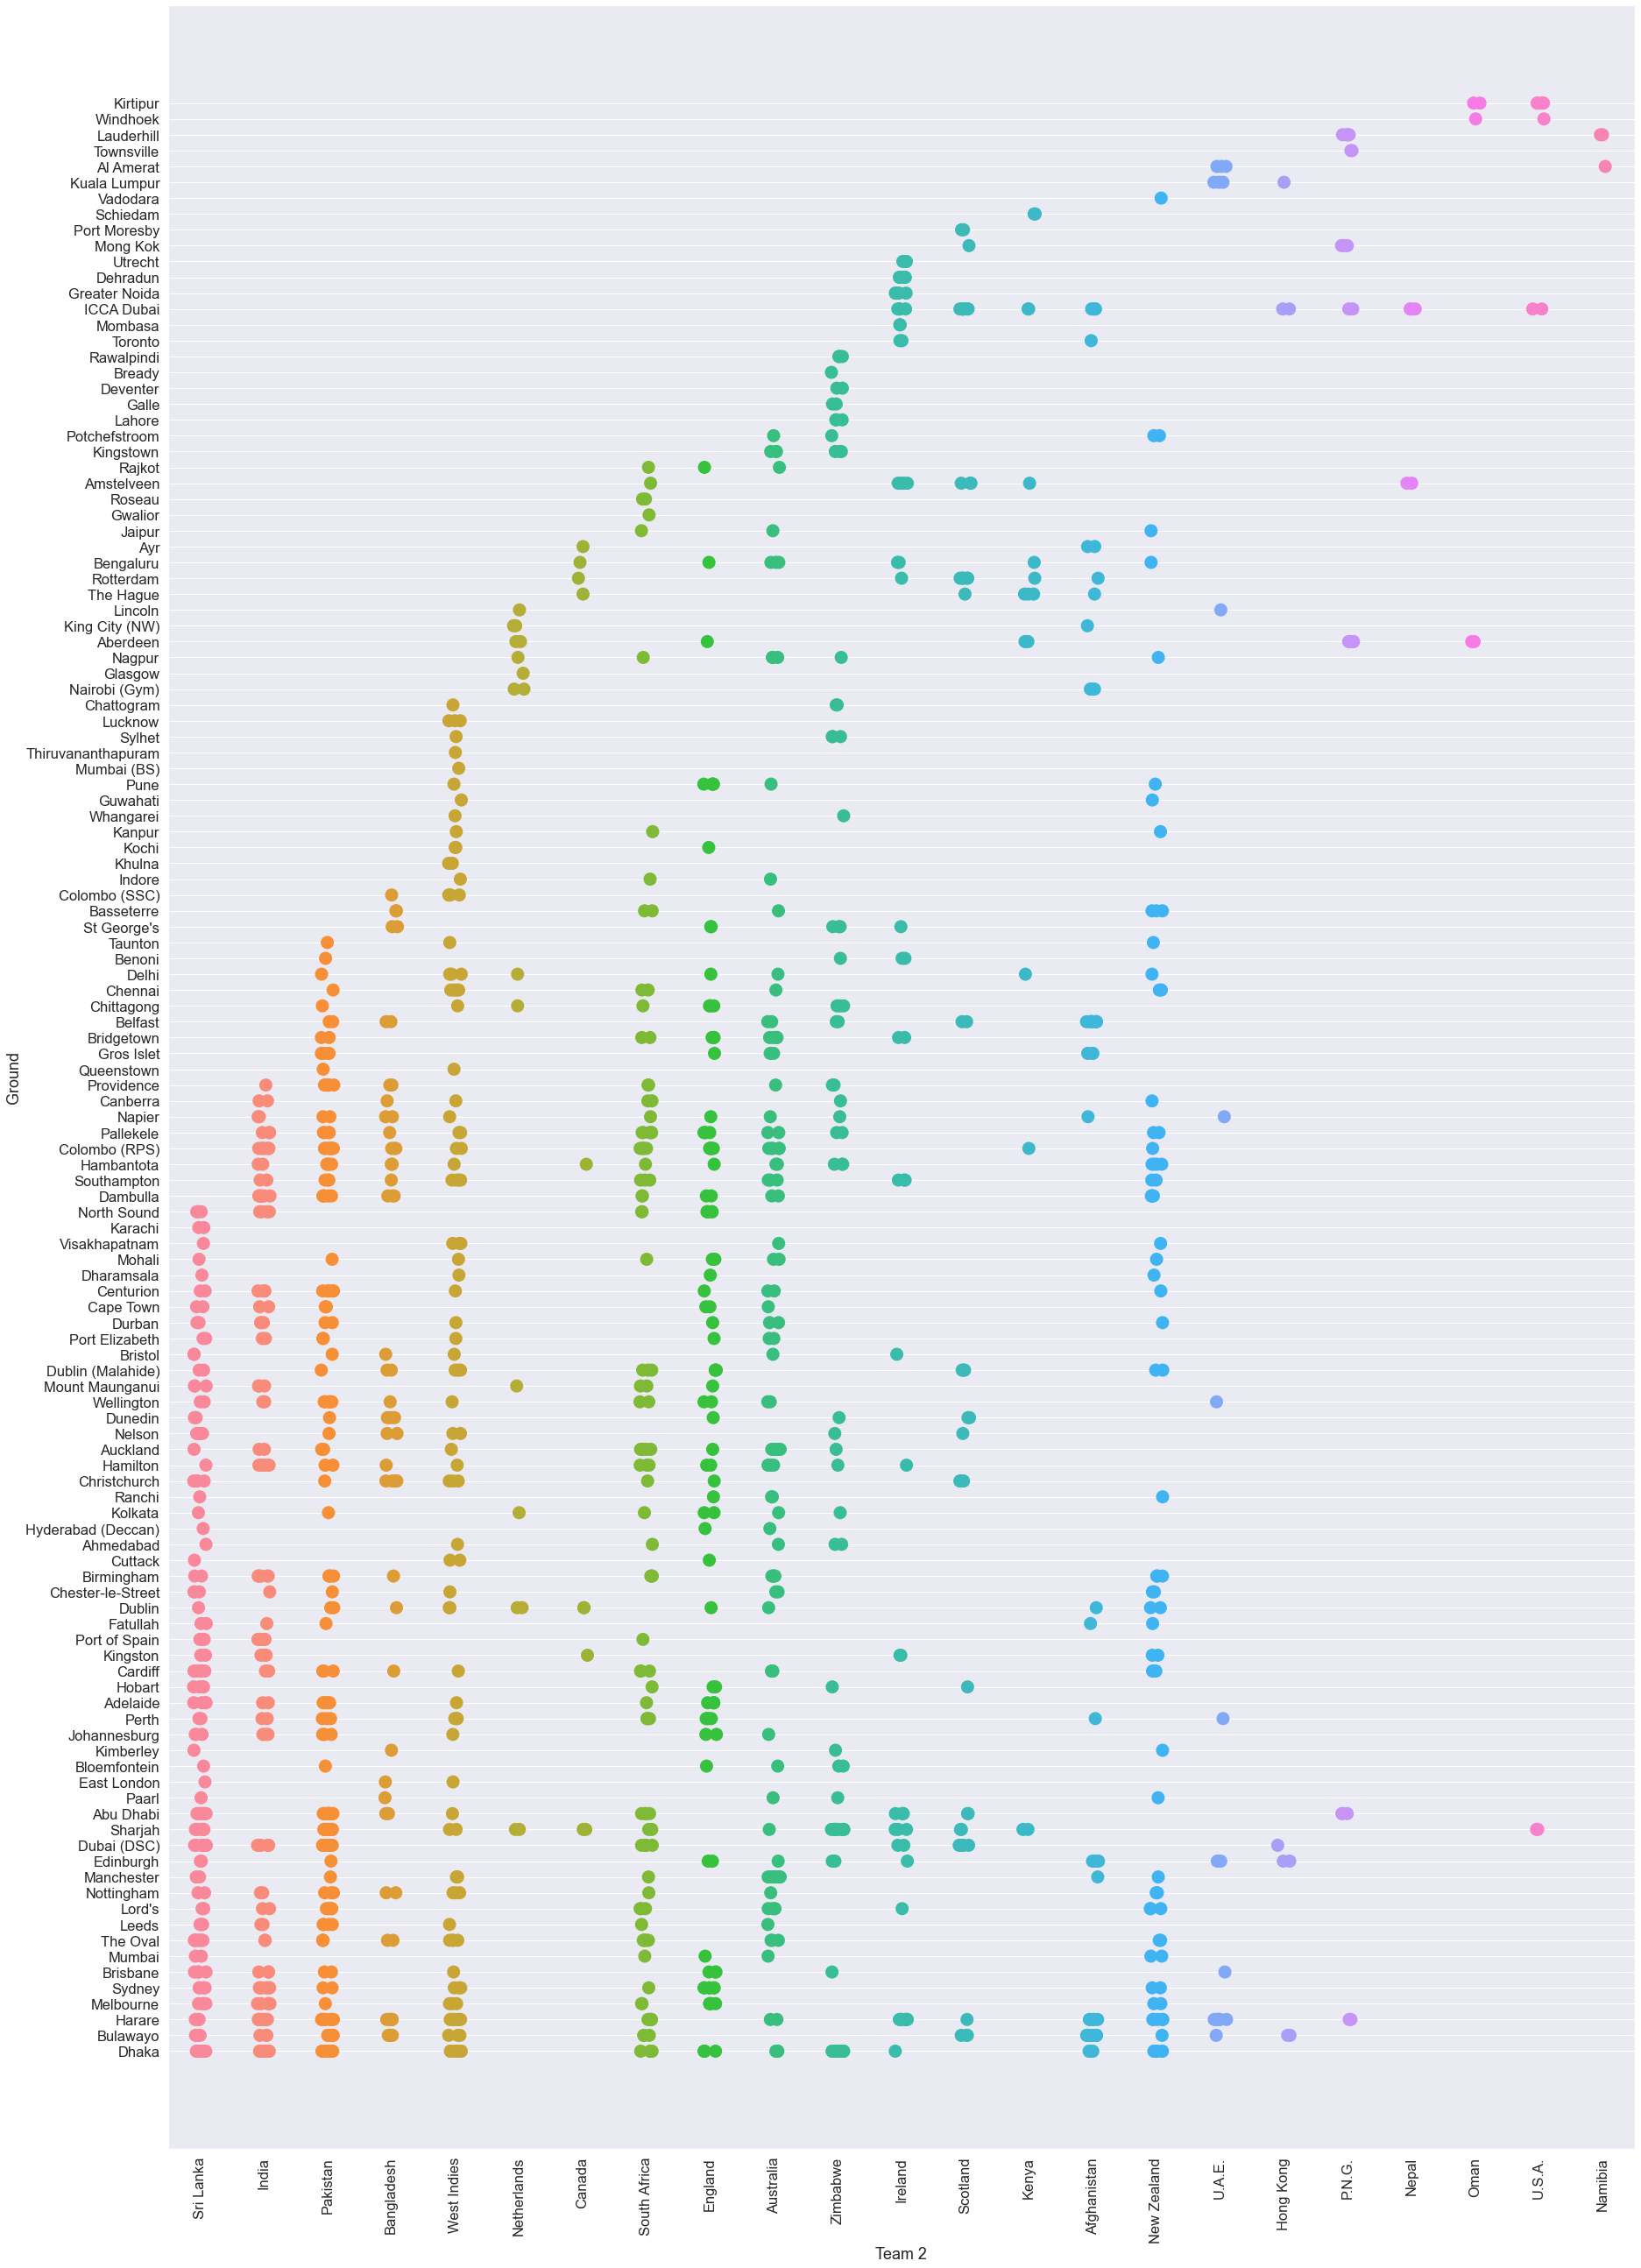

In [35]:
# strip plot between Team 2 and Ground column
sns.set(rc = {'figure.figsize':(30,45)},font_scale=1.5)
g=sns.stripplot(x="Team 2", y="Ground", data=df,s=15)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=90)

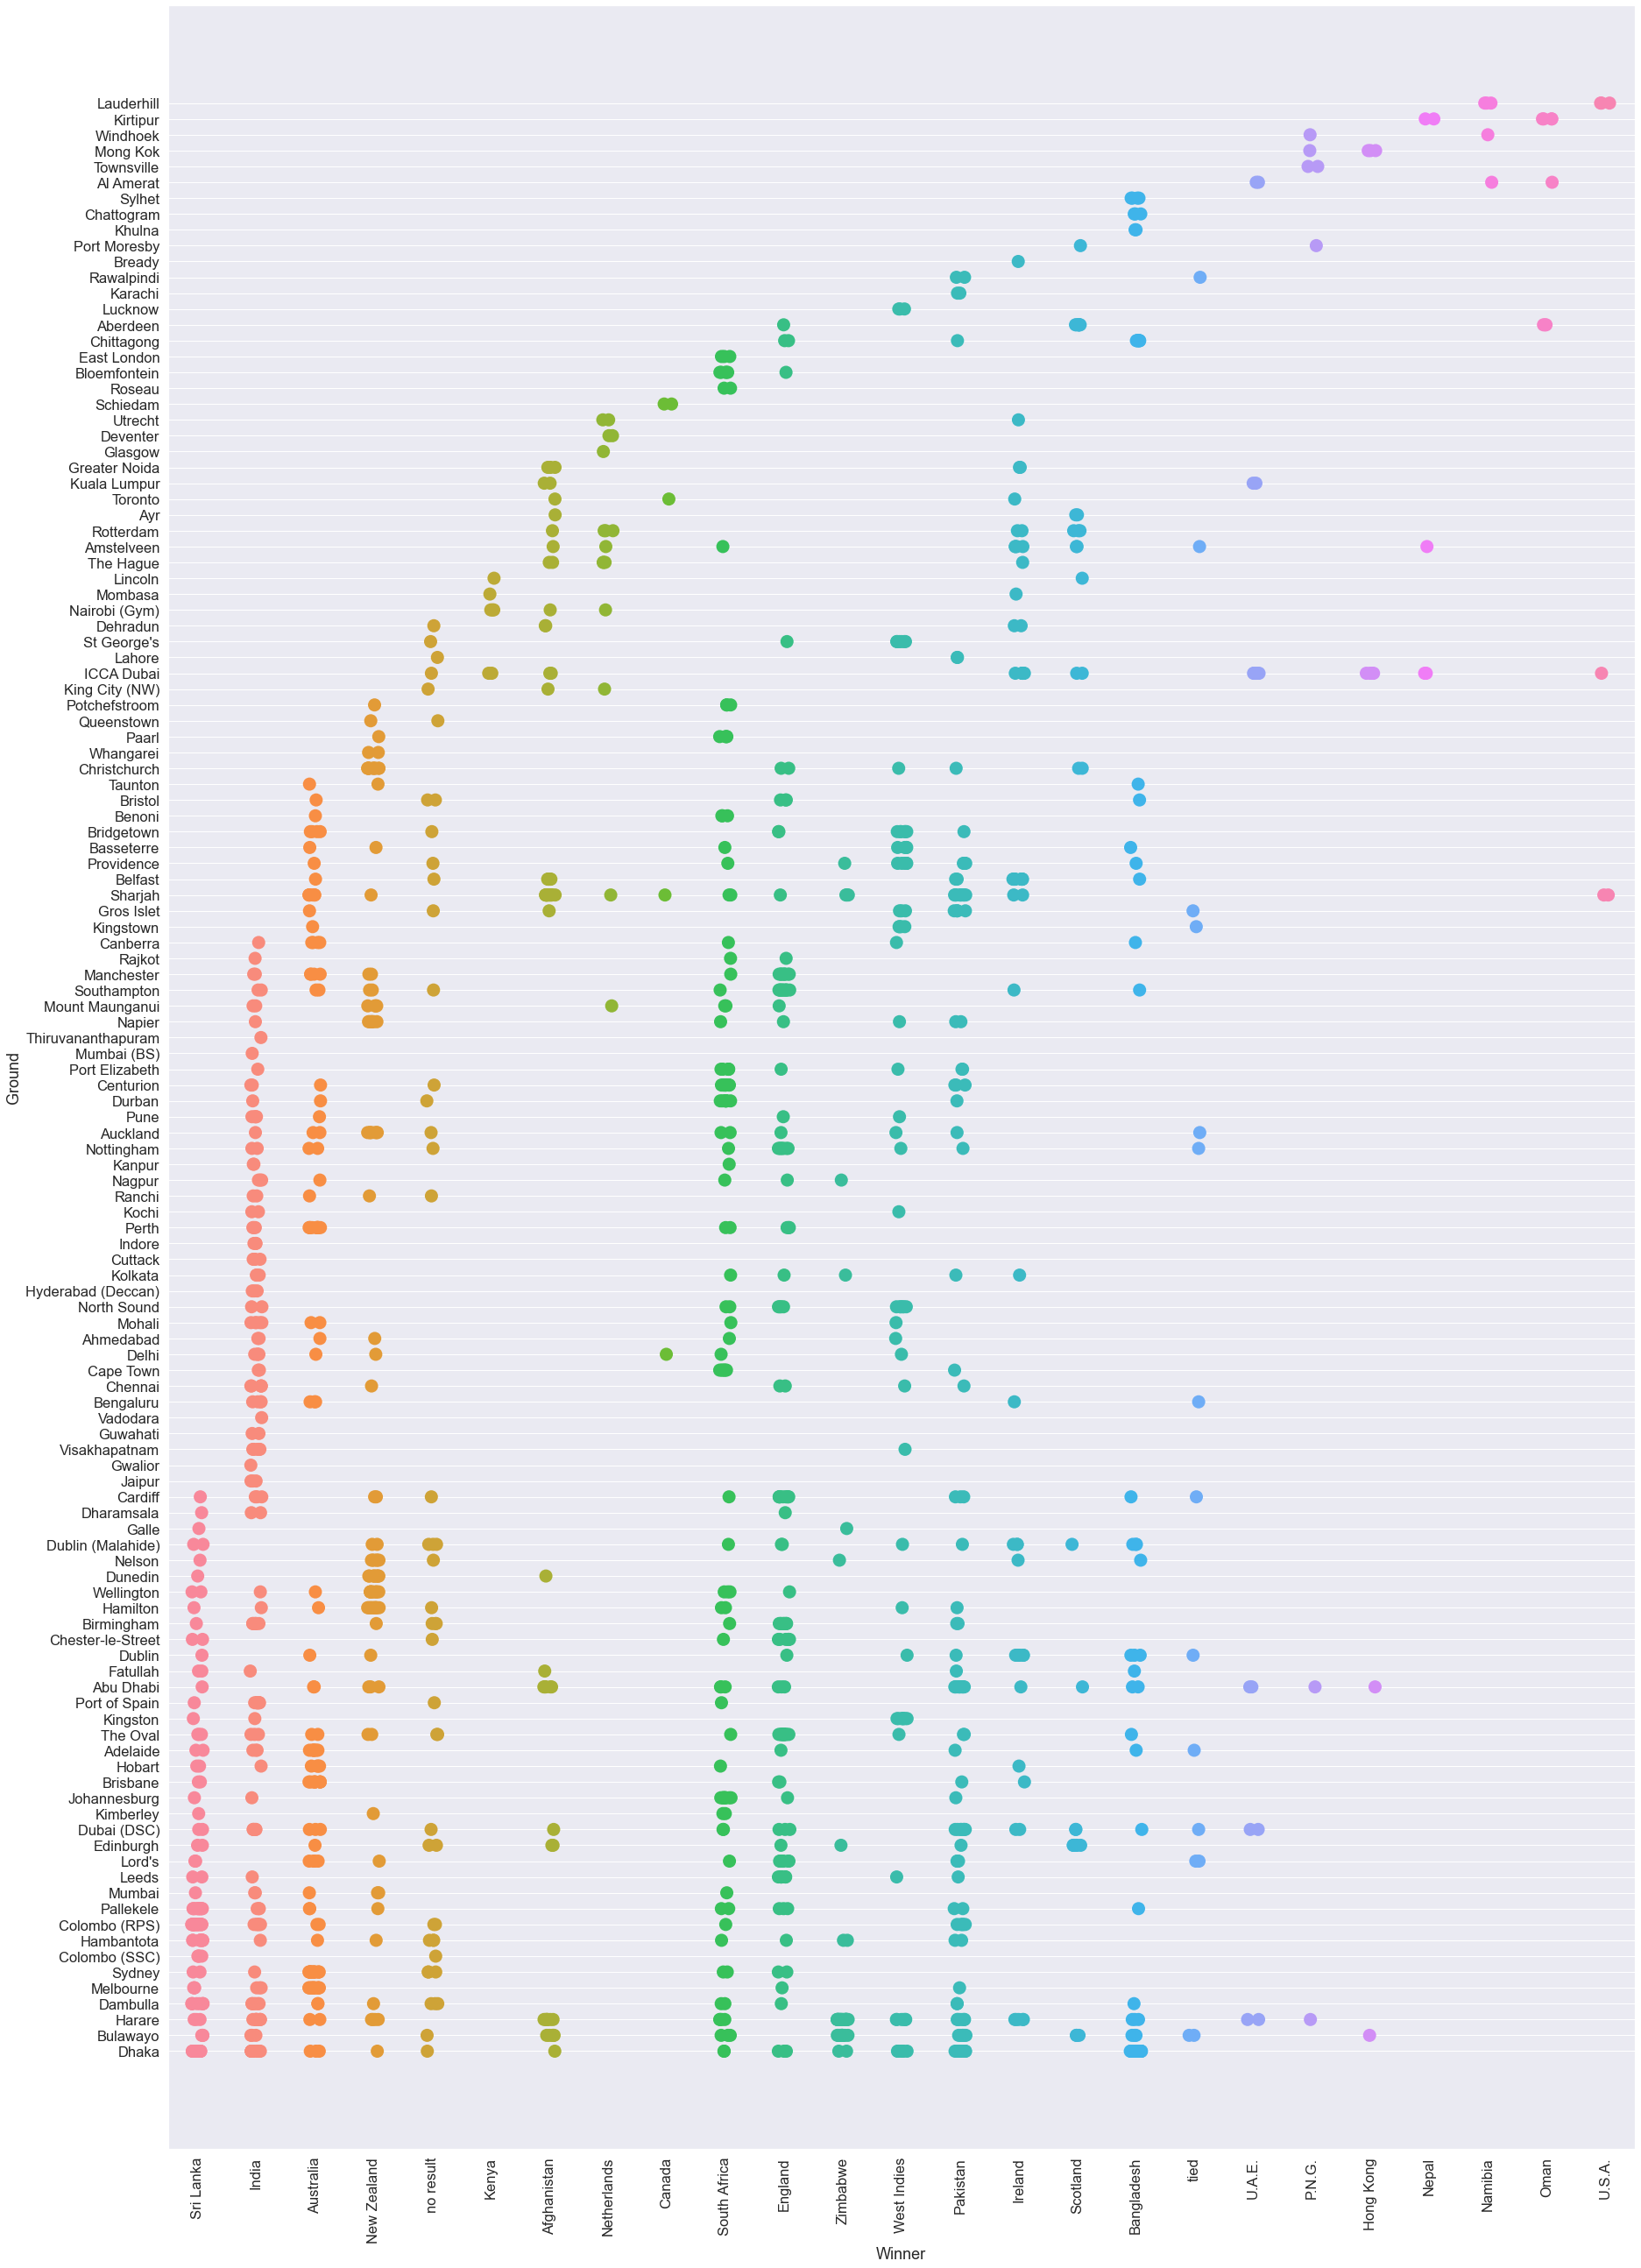

In [36]:
# strip plot between Winner and Ground column
sns.set(rc = {'figure.figsize':(30,45)},font_scale=1.5)
g=sns.stripplot(x="Winner", y="Ground", data=df,s=15)
ticks=g.set_xticklabels(g.get_xticklabels(), rotation=90)

Here, we can easily see which team has won more matches in which ground, for example, India has won most of its matches in Bengaluru,Mohali,Delhi,Dhaka

# Dendogram
A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters

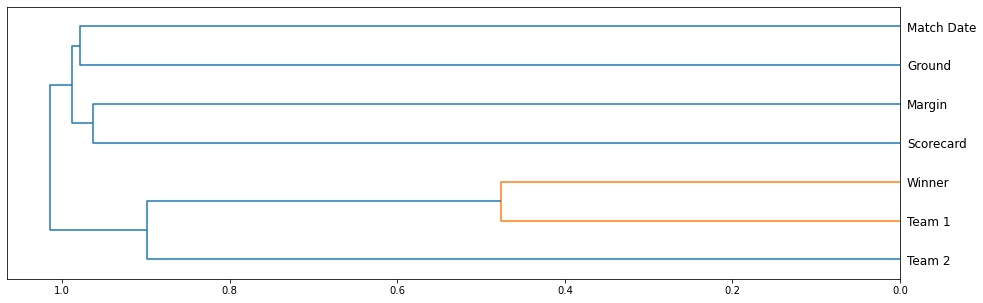

In [8]:
tempdf=df.dropna()
import scipy
from scipy.cluster import hierarchy
corr=np.round(scipy.stats.spearmanr(tempdf).correlation,4)
condensed=hierarchy.distance.squareform(1-corr)
avg=hierarchy.linkage(condensed,method='average')
fig = plt.figure(figsize=(16,5))
dendrogram = hierarchy.dendrogram(avg,labels=tempdf.columns,orientation='left')
plt.show()


Team 1 and winner are strongly correlated

In [82]:
# Droping rows with missing values
df.dropna().reset_index(inplace=True,drop=True)

In [83]:
# Filtering out the rows which contain winner column values as 'no result' and 'tied'
df = df[(df.Winner != 'no result') & (df.Winner != 'tied')]
df.reset_index(inplace=True,drop=True)
df.head()

Scorecard      Team 1     Team 2     Winner     Margin Ground  \
0  ODI # 2939  Bangladesh      India      India  6 wickets  Dhaka   
1  ODI # 2940  Bangladesh  Sri Lanka  Sri Lanka  9 wickets  Dhaka   
2  ODI # 2941       India  Sri Lanka      India  8 wickets  Dhaka   
3  ODI # 2942  Bangladesh      India      India  6 wickets  Dhaka   
4  ODI # 2943       India  Sri Lanka  Sri Lanka  4 wickets  Dhaka   

     Match Date  
0   Jan 7, 2010  
1   Jan 8, 2010  
2  Jan 10, 2010  
3  Jan 11, 2010  
4  Jan 13, 2010

# Feature Engineering
We breakdown the margin column into won by runs and won by wickets.We can create two new columns named team_1_first_batting and team_2_first_batting from Won by runs and Won by wickets 

In [84]:
wonbyruns=[]
wonbywickets=[]
for i in df.Margin:
  # Splitting the string data by space and making a list
  split_data=i.split(' ')
  try:
    run_index_search=split_data.index('run') #searching for index of "run" in string, after success index of "run" will be stored in index variable
    wonbyruns.append(int(split_data[run_index_search-1]))
    wonbywickets.append(0)
  except:
    pass
  try:
    runs_index_search=split_data.index('runs') #searching for index of "runs" in string, after success index of "run" will be stored in index variable
    wonbyruns.append(int(split_data[runs_index_search-1]))
    wonbywickets.append(0)
  except:
    pass
  try:
    wickets_index_search=split_data.index('wickets') 
    wonbywickets.append(int(split_data[wickets_index_search-1]))
    wonbyruns.append(0)
  except:
    pass
  try:
    wicket_index_search=split_data.index('wicket')
    wonbywickets.append(int(split_data[wicket_index_search-1]))
    wonbyruns.append(0)
  except:
    pass

df['Won by runs']=wonbyruns
df['Won by wickets']=wonbywickets
df.head()


Scorecard      Team 1     Team 2     Winner     Margin Ground  \
0  ODI # 2939  Bangladesh      India      India  6 wickets  Dhaka   
1  ODI # 2940  Bangladesh  Sri Lanka  Sri Lanka  9 wickets  Dhaka   
2  ODI # 2941       India  Sri Lanka      India  8 wickets  Dhaka   
3  ODI # 2942  Bangladesh      India      India  6 wickets  Dhaka   
4  ODI # 2943       India  Sri Lanka  Sri Lanka  4 wickets  Dhaka   

     Match Date  Won by runs  Won by wickets  
0   Jan 7, 2010            0               6  
1   Jan 8, 2010            0               9  
2  Jan 10, 2010            0               8  
3  Jan 11, 2010            0               6  
4  Jan 13, 2010            0               4

In [85]:
team_1_first_batting=[]
team_2_first_batting=[]
for team1,team2,wic,run,win in zip(df['Team 1'],df['Team 2'],df['Won by wickets'],df['Won by runs'],df['Winner']):

  # Check condition if runs are greater than 0 then team 1 is the winner 
  if (run>0) and (win==team1):
    team_1_first_batting.append(1)
    team_2_first_batting.append(0)
 # Check condition if runs are greater than 0 then team 2 is the winner 
  if(run>0) and (win==team2):
    team_2_first_batting.append(1)
    team_1_first_batting.append(0)
  # Check condition if wickets are greater than 0 then team 1 is the winner 
  if (wic>0) and (win==team1):
    team_1_first_batting.append(0)
    team_2_first_batting.append(1)
  # Check condition if wickets are greater than 0 then team 2 is the winner 
  if (wic>0) and (win==team2):
    team_1_first_batting.append(1)
    team_2_first_batting.append(0)
  

df['Team_1_First_Batting']=team_1_first_batting
df['Team_2_First_Batting']=team_2_first_batting

In [86]:
df.head()

Scorecard      Team 1     Team 2     Winner     Margin Ground  \
0  ODI # 2939  Bangladesh      India      India  6 wickets  Dhaka   
1  ODI # 2940  Bangladesh  Sri Lanka  Sri Lanka  9 wickets  Dhaka   
2  ODI # 2941       India  Sri Lanka      India  8 wickets  Dhaka   
3  ODI # 2942  Bangladesh      India      India  6 wickets  Dhaka   
4  ODI # 2943       India  Sri Lanka  Sri Lanka  4 wickets  Dhaka   

     Match Date  Won by runs  Won by wickets  Team_1_First_Batting  \
0   Jan 7, 2010            0               6                     1   
1   Jan 8, 2010            0               9                     1   
2  Jan 10, 2010            0               8                     0   
3  Jan 11, 2010            0               6                     1   
4  Jan 13, 2010            0               4                     1   

   Team_2_First_Batting  
0                     0  
1                     0  
2                     1  
3                     0  
4                     0

Instead of using winner team name as target values we can use, 1 to represent team 1 as winner and 2 to represent team 2 as winner. This will reduce multiclass classification problem as using team name as label the model will have to decide correct label from more than 10 labels. Hence, using only two labels will improve the performance of the model.

In [87]:
winning_team=[]
for team1,team2,win in zip(df["Team 1"],df["Team 2"],df["Winner"]):
  # Checking condition if team 1 is winner
  if win==team1:
    winning_team.append(1)
  if win==team2:
    winning_team.append(2)
df['Winning_team']=winning_team

In [88]:
df.head()

Scorecard      Team 1     Team 2     Winner     Margin Ground  \
0  ODI # 2939  Bangladesh      India      India  6 wickets  Dhaka   
1  ODI # 2940  Bangladesh  Sri Lanka  Sri Lanka  9 wickets  Dhaka   
2  ODI # 2941       India  Sri Lanka      India  8 wickets  Dhaka   
3  ODI # 2942  Bangladesh      India      India  6 wickets  Dhaka   
4  ODI # 2943       India  Sri Lanka  Sri Lanka  4 wickets  Dhaka   

     Match Date  Won by runs  Won by wickets  Team_1_First_Batting  \
0   Jan 7, 2010            0               6                     1   
1   Jan 8, 2010            0               9                     1   
2  Jan 10, 2010            0               8                     0   
3  Jan 11, 2010            0               6                     1   
4  Jan 13, 2010            0               4                     1   

   Team_2_First_Batting  Winning_team  
0                     0             2  
1                     0             2  
2                     1             1  
3                     0             2  
4                     0             2

Scaling won by runs and won by wickets:

In [89]:

def scale_data(df,col):
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler()
    df[col]=scaler.fit_transform(df[col])
    return(df)

In [90]:
col=['Won by runs','Won by wickets']

# passing data and columns for scaling
scale_data(df,col)

Scorecard       Team 1     Team 2       Winner     Margin  \
0     ODI # 2939   Bangladesh      India        India  6 wickets   
1     ODI # 2940   Bangladesh  Sri Lanka    Sri Lanka  9 wickets   
2     ODI # 2941        India  Sri Lanka        India  8 wickets   
3     ODI # 2942   Bangladesh      India        India  6 wickets   
4     ODI # 2943        India  Sri Lanka    Sri Lanka  4 wickets   
...          ...          ...        ...          ...        ...   
1305  ODI # 4309    Sri Lanka      India        India  3 wickets   
1306  ODI # 4310  West Indies  Australia    Australia   133 runs   
1307  ODI # 4311  West Indies  Australia  West Indies  4 wickets   
1308  ODI # 4312    Sri Lanka      India    Sri Lanka  3 wickets   
1309  ODI # 4313  West Indies  Australia    Australia  6 wickets   

             Ground       Match Date  Won by runs  Won by wickets  \
0             Dhaka      Jan 7, 2010     0.000000             0.6   
1             Dhaka      Jan 8, 2010     0.000000             0.9   
2             Dhaka     Jan 10, 2010     0.000000             0.8   
3             Dhaka     Jan 11, 2010     0.000000             0.6   
4             Dhaka     Jan 13, 2010     0.000000             0.4   
...             ...              ...          ...             ...   
1305  Colombo (RPS)     Jul 20, 2021     0.000000             0.3   
1306     Bridgetown     Jul 20, 2021     0.483636             0.0   
1307     Bridgetown  Jul 22-24, 2021     0.000000             0.4   
1308  Colombo (RPS)     Jul 23, 2021     0.000000             0.3   
1309     Bridgetown     Jul 26, 2021     0.000000             0.6   

      Team_1_First_Batting  Team_2_First_Batting  Winning_team  
0                        1                     0             2  
1                        1                     0             2  
2                        0                     1             1  
3                        1                     0             2  
4                        1                     0             2  
...                    ...                   ...           ...  
1305                     1                     0             2  
1306                     0                     1             2  
1307                     0                     1             1  
1308                     0                     1             1  
1309                     1                     0             2  

[1310 rows x 12 columns]

In [91]:
# Dummy the dataset columns Team 1 and Team 2 
dumified_data = pd.concat([df, pd.get_dummies(df['Team 1']),pd.get_dummies(df['Team 2']),pd.get_dummies(df['Ground'])] ,axis=1)

In [92]:
df=dumified_data
X=df.drop(['Scorecard','Winner','Winning_team','Match Date','Margin','Ground','Won by runs','Won by wickets'],inplace=False,axis=1)
y=df['Winning_team']

In [93]:
import sklearn
from sklearn.model_selection import train_test_split
y=np.array(y)
# splitting the data into train set of size 80% and valid set of size 20% with random_state = 123
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=12)

# Modeling

In [94]:
#Helper function to print metrics
def fnmetrics(model,y_pred):
  from sklearn import metrics
  from sklearn.metrics import classification_report
  from sklearn import preprocessing
  label_encoder = preprocessing.LabelEncoder()
  feature_name=X.columns
  
  print("accuracy score:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
  feature_scores[:100].plot(kind='bar',figsize=(20,10))
 


## 1.Logistic Regression:
Logistic regression is used to estimate the relationship between a dependent variable and one or more independent variables.It is used to make a prediction about a categorical variable versus a continuous one.

C:\Users\Sneha K K\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       0.70      0.75      0.73        83
           2       0.51      0.46      0.48        48

    accuracy                           0.64       131
   macro avg       0.61      0.60      0.60       131
weighted avg       0.63      0.64      0.64       131

                  feature
0                  Team 1
1                  Team 2
2    Team_1_First_Batting
3    Team_2_First_Batting
4             Afghanistan
..                    ...
169              Vadodara
170         Visakhapatnam
171            Wellington
172             Whangarei
173              Windhoek

[174 rows x 1 columns]
CPU times: total: 1.66 s
Wall time: 615 ms


<AxesSubplot:xlabel='feature'>

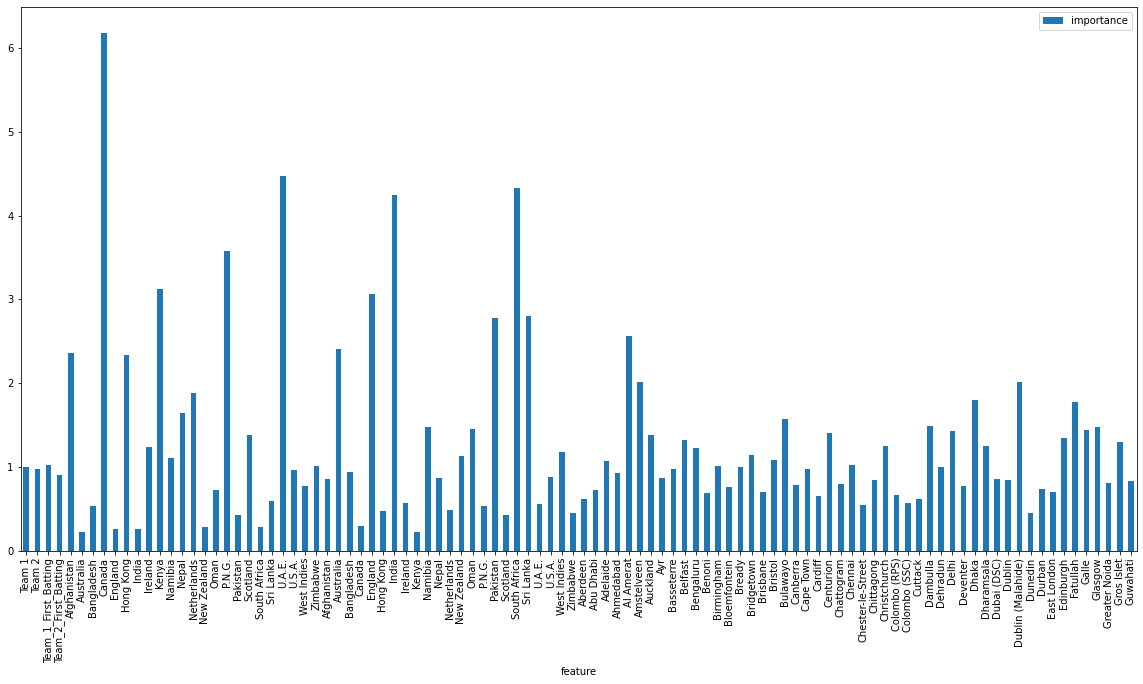

In [95]:
%%time
# Fit a LogisticRegression model to the train dataset
# Import LogisticRegression
# Instantiate the model
# Fit the model to the data
# print score on train and valid set
# print classification report of the model using function created before
# visualizing importance of features
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

X_train['Team 1']=label_encoder.fit_transform(X_train['Team 1'])
X_train['Team 2']=label_encoder.fit_transform(X_train['Team 2'])
X_test['Team 1']=label_encoder.fit_transform(X_test['Team 1'])
X_test['Team 2']=label_encoder.fit_transform(X_test['Team 2'])


logit= LogisticRegression()
logit=logit.fit(X_train,y_train)
y_pred_log=logit.predict(X_test)
model=logit
print(classification_report(y_test,y_pred_log))
import math
w0=model.intercept_[0]
w=model.coef_[0]
feature_name=X.columns
feature_importance=pd.DataFrame(feature_name,columns=['feature'])
print(feature_importance)
feature_importance['importance']=pow(math.e,np.array(w))
feature_importance.sort_values(by=['importance'])

feature_importance[:100].plot.bar(x='feature',y='importance',figsize=(20,10))


## 2.Random Forest Classifier
Random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

accuracy score: 0.6564885496183206
              precision    recall  f1-score   support

           1       0.72      0.76      0.74        83
           2       0.53      0.48      0.51        48

    accuracy                           0.66       131
   macro avg       0.63      0.62      0.62       131
weighted avg       0.65      0.66      0.65       131

CPU times: total: 3.89 s
Wall time: 3.92 s


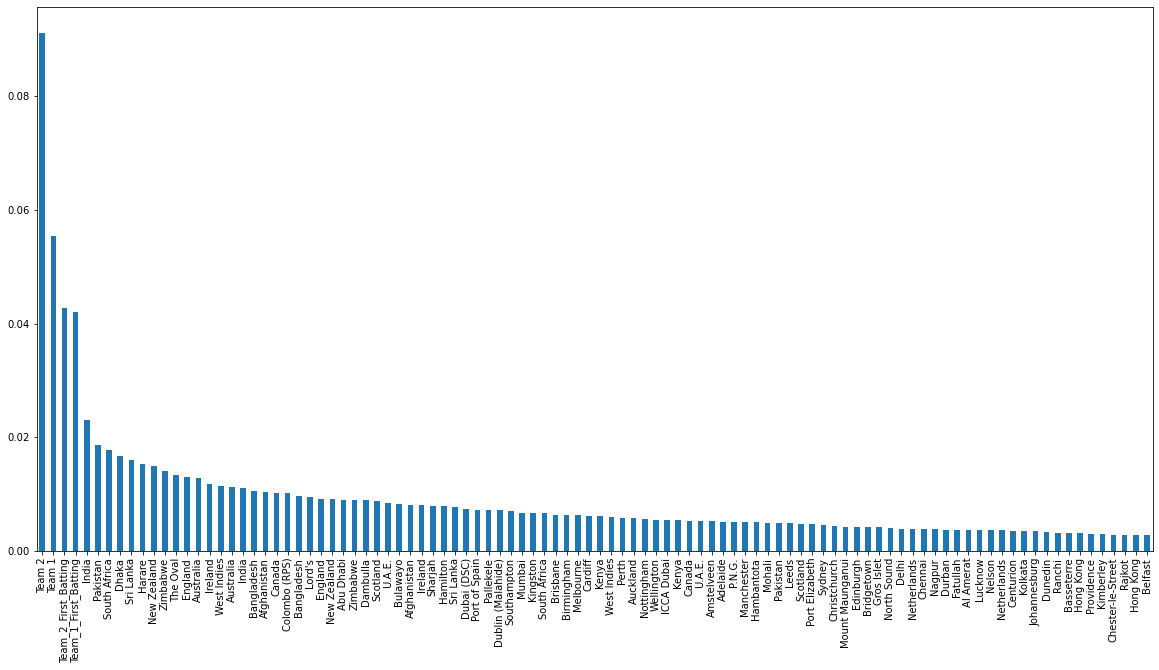

In [96]:
%%time

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=30,n_estimators=500, random_state=0)
clf=clf.fit(X_train, y_train)
y_pred_clf=clf.predict(X_test)
fnmetrics(clf,y_pred_clf)





## 3.Gaussian Naive Bayes
A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

In [97]:
%%time
from sklearn.naive_bayes import GaussianNB  
gnb=GaussianNB()
gnb=gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
print(classification_report(y_test,y_pred_gnb))
print("accuracy score:",metrics.accuracy_score(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           1       0.74      0.17      0.27        83
           2       0.38      0.90      0.54        48

    accuracy                           0.44       131
   macro avg       0.56      0.53      0.41       131
weighted avg       0.61      0.44      0.37       131

accuracy score: 0.4351145038167939
CPU times: total: 31.2 ms
Wall time: 31.8 ms


## 4.K Neighbours Classifier
K-Nearest Neighbor is a simple supervised classification algorithm. It can be used for regression as well as classification. It is non-parametric as it does not make assumption on the data distribution.

In [98]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))
print("accuracy score:",metrics.accuracy_score(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       0.64      0.76      0.69        83
           2       0.38      0.25      0.30        48

    accuracy                           0.57       131
   macro avg       0.51      0.50      0.50       131
weighted avg       0.54      0.57      0.55       131

accuracy score: 0.5725190839694656
CPU times: total: 141 ms
Wall time: 49.1 ms


## 5. Support Vector Machine



In [7]:
from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
  
y_pred_svc = svc_model .predict(X_test)
print(classification_report(y_test,y_pred_svc))
print("accuracy score:",metrics.accuracy_score(y_test,y_pred_svc))


      precision    recall  f1-score   support

           1       0.82      0.86      0.86        83
           2       0.62      0.52      0.60        48

    accuracy                           0.76       131
   macro avg       0.77      0.74      0.74       131
weighted avg       0.75      0.76      0.75       131

accuracy score: 0.7546564885496184


Let's try bagging

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

bgc = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 random_state=1, n_jobs=20)
bgc.fit(X_train,y_train)
y_pred_bgc=bgc.predict(X_test)
print(classification_report(y_test,y_pred_bgc))
print("accuracy score:",metrics.accuracy_score(y_test,y_pred_bgc))



      precision    recall  f1-score   support

           1       0.82      0.82      0.82        83
           2       0.62      0.62      0.62        48

    accuracy                           0.75       131
   macro avg       0.72      0.72      0.72       131
weighted avg       0.75      0.75      0.75       131

accuracy score: 0.748854961832061


# Result and Conclusion
 We are able to build a model with 76% accuracy.The seemingly low level of accuracy in most of the algorithms is due to the uncertainity of the game, and hence boosting is necessary.A lot of physical and psychological factors could affect the outcome of a particular match. 
SVM outperformed all the other models and can hence be used to predict the winners of ODI matches.